# RPV SUSY Studies

## Importing packages and setting up containers

In [116]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from h5py import File
from scipy.stats import norm
import random
import mplhep as hep
import pickle
plt.style.use('default')
# Use the ATLAS style in mplhep
plt.style.use(hep.style.ATLAS)

## ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Inspecting the signal samples

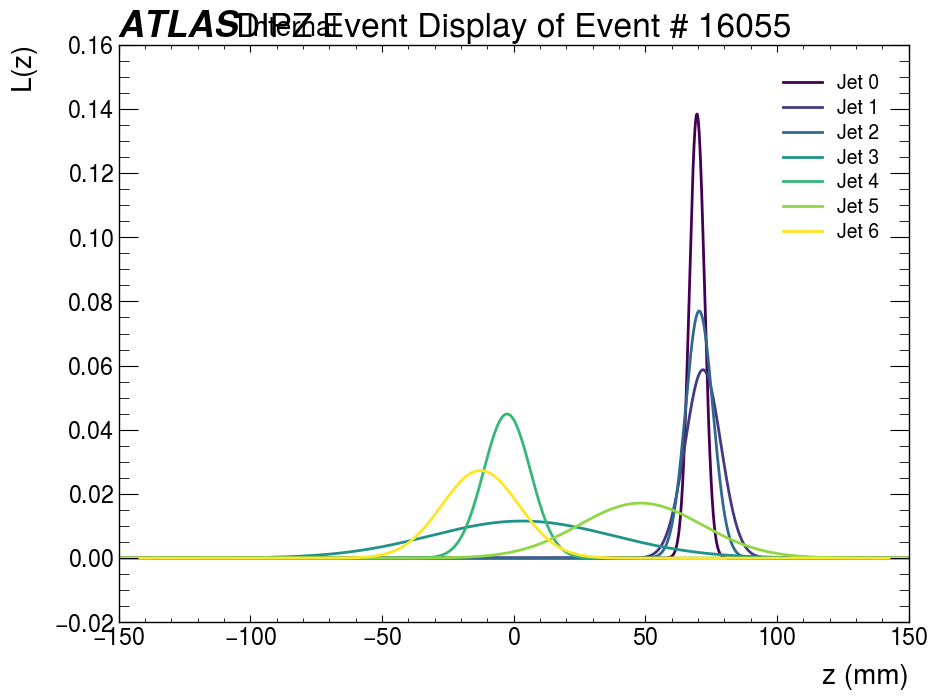

In [74]:
# Load data
name = "/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5"
data = File(name, 'r')
jets = np.asarray(data['jets'])
uniques = np.unique(jets["eventNumber"])

# Selecting a Random Event ID from Preselected Events 
random_number = random.randrange(0, len(uniques))

# Select a random event from preselected events
#event_id = random.choice(evts_rpv_200_presel5c20)
event_id = random.choice(uniques)
event_id = 16055
event_jets = jets[jets["eventNumber"] == event_id]
num_jets = len(event_jets)

# Setup plot
fig, ax = plt.subplots(figsize=(10, 7.5))
hep.atlas.label(ax=ax, loc=0, data=True, label="Internal", year=2023, com=13.6, rlabel="", fontsize=20
                #lumi=0.00442985,
                #lumi_format="{0:.1}",
                #llabel="Internal", 
                #fontname="",
                #exp_weight="",
                #italic=((True,True,True)),
                #pad = 
               )


# Generate colors for each jet
colors = plt.cm.viridis(np.linspace(0, 1, num_jets))

# Plot Gaussian distributions
x = np.arange(-150, 150, 0.01)
for i in range(num_jets):
    mu = event_jets[i]["dipz20231122_z"]
    sigma = np.exp(-0.5 * event_jets[i]["dipz20231122_negLogSigma2"])
    ax.plot(x, norm.pdf(x, mu, sigma), color=colors[i], linewidth=2, label=f'Jet {i}')

# Finalize plot
plt.xlabel("z (mm)", loc='right')
plt.ylabel("$\mathcal{L}$(z)")
plt.title(f"DIPZ Event Display of Event # {event_id}")
plt.legend(loc='upper right')
plt.show()

### Generating PDF Plots

In [14]:
# # Define paths and load data
# name = "/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5"
# data = File(name, 'r')
# jets = np.asarray(data['jets'])
# uniques = np.unique(jets["eventNumber"])

# # PDF output file
# output_pdf_path = "/users/maboelela/PhD/DIPZ/RPV_SUSY_Study_Plots/Event_Displays_RPV_200_L14jJ40_minus_presel5c20.pdf"

# # Initialize PdfPages
# with PdfPages(output_pdf_path) as pdf:
#     # Iterate through each event ID in evts_rpv_200_presel5c20
#     for event_id in set(uniques) - set(evts_rpv_200_presel5c20):
#         # Filter jets for the current event
#         event_jets = jets[jets["eventNumber"] == event_id]
#         num_jets = len(event_jets)

#         # Set up the plot for this event
#         fig, ax = plt.subplots(figsize=(10, 7.5))
#         hep.atlas.label(ax=ax, loc=0, data=True, label="Internal", year=2023, com=13.6, rlabel="", fontsize=20
#                 #lumi=0.00442985,
#                 #lumi_format="{0:.1}",
#                 #llabel="Internal", 
#                 #fontname="",
#                 #exp_weight="",
#                 #italic=((True,True,True)),
#                 #pad = 
#                )

#         # Generate a color map for consistent colors across jets
#         colors = plt.cm.viridis(np.linspace(0, 1, num_jets))

#         # Define x range for Gaussian plotting
#         x = np.arange(-150, 150, 0.01)

#         # Plot each jet as a Gaussian distribution
#         for i in range(num_jets):
#             mu = event_jets[i]["dipz20231122_z"]
#             sigma = np.exp(-0.5 * event_jets[i]["dipz20231122_negLogSigma2"])
#             ax.plot(x, norm.pdf(x, mu, sigma), color=colors[i], linewidth=2, label=f'Jet {i}')

#         # Customize plot labels and title
#         plt.xlabel("z (mm)", loc='right')
#         plt.ylabel("$\mathcal{L}$(z)")
#         plt.title(f"DIPZ Event Display of Event # {event_id}")
#         plt.legend(loc='upper right')

#         # Save the current figure to the PDF
#         pdf.savefig(fig)
#         plt.close(fig)  # Close the figure to save memory

# # Confirm output location
# print(f"PDF generated and saved to {output_pdf_path}")

## ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Emulating trigger chains and getting the MLPL distributions

In [15]:
"""Defining the presel-emulating function"""
def get_passing(name, numjets, pt_cut):
    data = File(name, 'r')
    jets = data['jets']    
    jets = np.asarray(jets)
    uniques = np.unique(jets["eventNumber"])
        
    counter = 0
    evts = []
    print("The initial number of events in the provided data sample" + name + " is: " + str(len(uniques)))

    for id in uniques:
        event_jets = jets[jets["eventNumber"] == id]
        event_jets_above_threshold = event_jets[event_jets["pt"] > pt_cut * 1000]

        if len(event_jets_above_threshold) >= numjets:
            counter +=1
            evts.append(id)

    print("The efficiency is: " + str( (counter / 10000) * 100) + "%")
    return counter, evts

### (BENCHMARK CHAIN) HLT_6j20_pf_ftf_presel6c25_PhysicsTLA_L14jJ40

In [16]:
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_HLT_6j20_pf_ftf_presel6c25_PhysicsTLA_L14jJ40.h5", 'r')
jets = data['jets']    
jets = np.asarray(jets)
uniques = np.unique(jets["eventNumber"])

print("The efficiency is: " + str( ( len(uniques) / 10000) * 100) + "%")

The efficiency is: 59.5%


In [17]:
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_all.h5", 'r')
pflow = data['pflow']
emtopo = data['emtopo']
pflow_jets = pflow['jets']
emtopo_jets = emtopo['jets']    
pflow_jets = np.asarray(pflow_jets)
emtopo_jets = np.asarray(emtopo_jets)
uniques_pflow = np.unique(pflow_jets["eventNumber"])
uniques_emtopo = np.unique(emtopo_jets["eventNumber"])

emtopo_pt_cut = 25
num_emtopo_jets = 6
pflow_pt_cut = 20
num_pflow_jets = 6

counter = 0
evts_rpv_200_6j20_presel6c25 = []
for id in uniques_pflow:
    event_pflow_jets = pflow_jets[pflow_jets["eventNumber"] == id]
    event_pflow_jets_above_threshold = event_pflow_jets[event_pflow_jets["pt"] >= pflow_pt_cut * 1000]
    event_emtopo_jets = emtopo_jets[emtopo_jets["eventNumber"] == id]
    event_emtopo_jets_above_threshold = event_emtopo_jets[event_emtopo_jets["pt"] >= emtopo_pt_cut * 1000]

    if len(event_emtopo_jets_above_threshold) >= num_emtopo_jets and len(event_pflow_jets_above_threshold) >= num_pflow_jets:
        counter +=1
        evts_rpv_200_6j20_presel6c25.append(id)


print("The efficiency is: " + str( (counter / 10000) * 100) + "%")

The efficiency is: 56.230000000000004%


In [18]:
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_100_L14jJ40_all.h5", 'r')
pflow = data['pflow']
emtopo = data['emtopo']
pflow_jets = pflow['jets']
emtopo_jets = emtopo['jets']    
pflow_jets = np.asarray(pflow_jets)
emtopo_jets = np.asarray(emtopo_jets)
uniques_pflow = np.unique(pflow_jets["eventNumber"])
uniques_emtopo = np.unique(emtopo_jets["eventNumber"])

emtopo_pt_cut = 25
num_emtopo_jets = 6
pflow_pt_cut = 20
num_pflow_jets = 6

counter = 0
evts_rpv_100_6j20_presel6c25 = []
for id in uniques_pflow:
    event_pflow_jets = pflow_jets[pflow_jets["eventNumber"] == id]
    event_pflow_jets_above_threshold = event_pflow_jets[event_pflow_jets["pt"] >= pflow_pt_cut * 1000]
    event_emtopo_jets = emtopo_jets[emtopo_jets["eventNumber"] == id]
    event_emtopo_jets_above_threshold = event_emtopo_jets[event_emtopo_jets["pt"] >= emtopo_pt_cut * 1000]

    if len(event_emtopo_jets_above_threshold) >= num_emtopo_jets and len(event_pflow_jets_above_threshold) >= num_pflow_jets:
        counter +=1
        evts_rpv_100_6j20_presel6c25.append(id)


print("The efficiency is: " + str( (counter / 10000) * 100) + "%")

The efficiency is: 17.69%


### HLT_j0_pf_ftf_presel6c25_PhysicsTLA_L14jJ40

In [19]:
rpv_100_presel6c25, evts_rpv_100_presel6c25 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", 6, 25)
rpv_200_presel6c25, evts_rpv_200_presel6c25 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", 6, 25)
EBdata_presel6c25, evts_EBdata_presel6c25 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", 6, 25)

# Total counts for normalization
total_signal_100_presel6c25 = 10000
total_signal_200_presel6c25 = 10000
total_background_presel6c25 = 100000

# Calculate efficiencies and rejections
signal_100_presel6c25_efficiency = rpv_100_presel6c25 / total_signal_100_presel6c25
signal_200_presel6c25_efficiency = rpv_200_presel6c25 / total_signal_200_presel6c25
background_presel6c25_efficiency = EBdata_presel6c25 / total_background_presel6c25
background_presel6c25_rejection = 1 / background_presel6c25_efficiency

The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5 is: 4912
The efficiency is: 25.040000000000003%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5 is: 8910
The efficiency is: 63.17%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5 is: 3992
The efficiency is: 17.37%


### HLT_j0_pf_ftf_presel6c20_PhysicsTLA_L14jJ40

In [20]:
sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

rpv_100_presel6c20, evts_rpv_100_presel6c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", 6, 20)
rpv_200_presel6c20, evts_rpv_200_presel6c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", 6, 20)
EBdata_presel6c20, evts_EBdata_presel6c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", 6, 20)

# Total counts for normalization
total_signal_100_presel6c20 = 10000
total_signal_200_presel6c20 = 10000
total_background_presel6c20 = 100000

# Calculate efficiencies and rejections
signal_100_presel6c20_efficiency = rpv_100_presel6c20 / total_signal_100_presel6c20
signal_200_presel6c20_efficiency = rpv_200_presel6c20 / total_signal_200_presel6c20
background_presel6c20_efficiency = EBdata_presel6c20 / total_background_presel6c20
background_presel6c20_rejection = 1 / background_presel6c20_efficiency


The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5 is: 4912


The efficiency is: 39.54%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5 is: 8910
The efficiency is: 79.35%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5 is: 3992
The efficiency is: 27.0%


### HLT_j0_pf_ftf_presel5c20_PhysicsTLA_L14jJ40

In [21]:
sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

rpv_100_presel5c20, evts_rpv_100_presel5c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", 5, 20)
rpv_200_presel5c20, evts_rpv_200_presel5c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", 5, 20)
EBdata_presel5c20, evts_EBdata_presel5c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", 5, 20)

# Total counts for normalization
total_signal_100_presel5c20 = 10000
total_signal_200_presel5c20 = 10000
total_background_presel5c20 = 100000

# Calculate efficiencies and rejections
signal_100_presel5c20_efficiency = rpv_100_presel5c20 / total_signal_100_presel5c20
signal_200_presel5c20_efficiency = rpv_200_presel5c20 / total_signal_200_presel5c20
background_presel5c20_efficiency = EBdata_presel5c20 / total_background_presel5c20
background_presel5c20_rejection = 1 / background_presel5c20_efficiency


The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5 is: 4912


The efficiency is: 45.47%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5 is: 8910
The efficiency is: 86.42999999999999%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5 is: 3992
The efficiency is: 32.56%


### HLT_j0_pf_ftf_presel4c20_PhysicsTLA_L14jJ40

In [22]:
sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

rpv_100_presel4c20, evts_rpv_100_presel4c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", 4, 20)
rpv_200_presel4c20, evts_rpv_200_presel4c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", 4, 20)
EBdata_presel4c20, evts_EBdata_presel4c20 = get_passing("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", 4, 20)

# Total counts for normalization
total_signal_100_presel4c20 = 10000
total_signal_200_presel4c20 = 10000
total_background_presel4c20 = 100000

# Calculate efficiencies and rejections
signal_100_presel4c20_efficiency = rpv_100_presel4c20 / total_signal_100_presel4c20
signal_200_presel4c20_efficiency = rpv_200_presel4c20 / total_signal_200_presel4c20
background_presel4c20_efficiency = EBdata_presel4c20 / total_background_presel4c20
background_presel4c20_rejection = 1 / background_presel4c20_efficiency


The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5 is: 4912


The efficiency is: 48.15%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5 is: 8910
The efficiency is: 88.64%
The initial number of events in the provided data sample/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5 is: 3992
The efficiency is: 36.55%


### HLT_j0_pf_ftf_preselZ**4c20_PhysicsTLA_L14jJ40

In [23]:
# sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

# %load_ext autoreload
# %autoreload

# from mlplGetter_functions import get_MLPL_dist_MC
# from mlplGetter_functions import get_MLPL_dist_EBdata

# hypo = [
#     #[ '6' , 'all' ],
#     #[ '5' , 'all' ],
#     #[ '5' , '6' ],
#     [ '4' , 'all' ],     
#     #[ '4' , '6' ],          
#     #[ '4' , '5' ],          
#     #[ '3' , 'all' ],     
#     #[ '3' , '5' ],
#     #[ '3' , '4' ],         
#     #[ '2' , 'all' ],      
# ]

# print("Getting MLPL (" + hypo[0][0] + ', ' + hypo[0][1] + ') distributions:')
# folder_name = './MLPL_Distributions/mlpl_' + hypo[0][0] + '_' + hypo[0][1] + '/'
# comb_num = int(hypo[0][0])
# if hypo[0][1] == 'all' :
#     num_highest_pt = 555555
# else: 
#     num_highest_pt = int(hypo[0][1])

# presel_pt_threshold = 20

# rpv100_preselZ4c20_dist, rpv100_preselZ4c20_dist_weights, evts_rpv100_preselZ4c20= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# rpv200_preselZ4c20_dist, rpv200_preselZ4c20_dist_weights, evts_rpv200_preselZ4c20= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# EB_dist_preselZ4c20, EB_dist_preselZ4c20_weights, evts_EB_preselZ4c20= get_MLPL_dist_EBdata("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", "/users/maboelela/PhD/DIPZ/Datasets/EnhancedBiasWeights_440499.xml", comb_num, num_highest_pt, presel_pt_threshold)

# preselZ4c20 = {
#     "rpv100_preselZ4c20_dist" : rpv100_preselZ4c20_dist,
#     "rpv100_preselZ4c20_dist_weights" : rpv100_preselZ4c20_dist_weights,
#     "evts_rpv100_preselZ4c20" : evts_rpv100_preselZ4c20,
#     "rpv200_preselZ4c20_dist" : rpv200_preselZ4c20_dist,
#     "rpv200_preselZ4c20_dist_weights" : rpv200_preselZ4c20_dist_weights,
#     "evts_rpv200_preselZ4c20": evts_rpv200_preselZ4c20,
#     "EB_dist_preselZ4c20" : EB_dist_preselZ4c20,
#     "EB_dist_preselZ4c20_weights" : EB_dist_preselZ4c20_weights,
#     "evts_EB_preselZ4c20" : evts_EB_preselZ4c20
# }

# # Save the dictionary to a Pickle file
# with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ4c20.pkl", "wb") as file:
#     pickle.dump(preselZ4c20, file)

In [24]:
# Retrieving relevant lists
with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ4c20.pkl", "rb") as file:
    loaded_data = pickle.load(file)

rpv100_preselZ4c20_dist = loaded_data["rpv100_preselZ4c20_dist"]
rpv100_preselZ4c20_dist_weights = loaded_data["rpv100_preselZ4c20_dist_weights"]
evts_rpv100_preselZ4c20 = loaded_data["evts_rpv100_preselZ4c20"]
rpv200_preselZ4c20_dist = loaded_data["rpv200_preselZ4c20_dist"]
rpv200_preselZ4c20_dist_weights = loaded_data["rpv200_preselZ4c20_dist_weights"]
evts_rpv200_preselZ4c20 = loaded_data["evts_rpv200_preselZ4c20"]
EB_dist_preselZ4c20 = loaded_data["EB_dist_preselZ4c20"]
EB_dist_preselZ4c20_weights = loaded_data["EB_dist_preselZ4c20_weights"]
evts_EB_preselZ4c20 = loaded_data["evts_EB_preselZ4c20"]

#### Discriminant Variable (MLPL) Overlayed Histograms

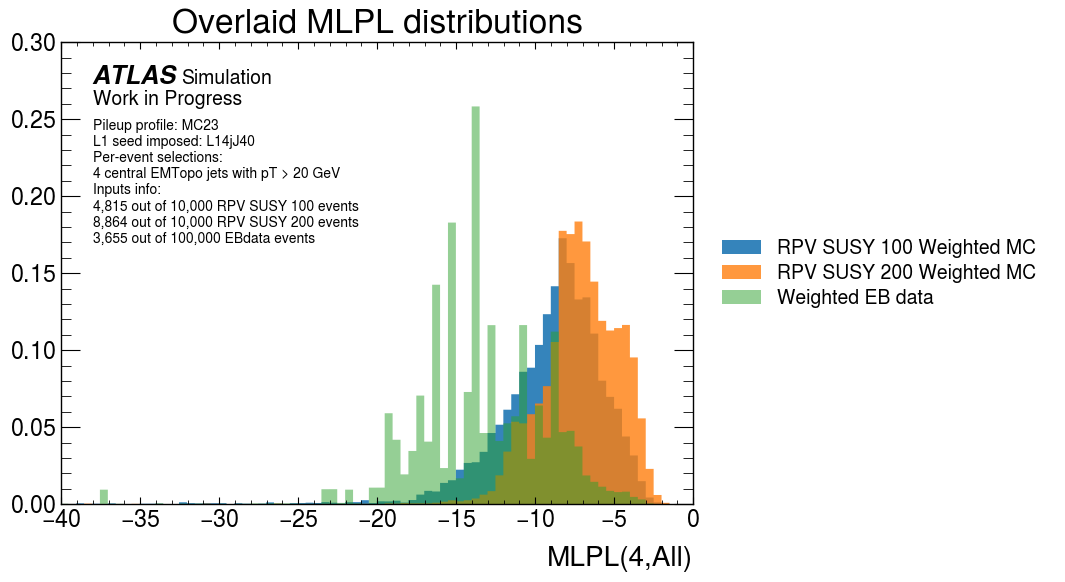

In [25]:
"""MLPL Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

minMLPL = min([min(EB_dist_preselZ4c20),min(rpv100_preselZ4c20_dist), min(rpv200_preselZ4c20_dist)])
bins = np.linspace(minMLPL, 0, int(0-minMLPL) * 2)
plt.hist(rpv100_preselZ4c20_dist, bins, alpha=0.9, label='RPV SUSY 100 Weighted MC', histtype='stepfilled', density=True, weights=rpv100_preselZ4c20_dist_weights)
plt.hist(rpv200_preselZ4c20_dist, bins, alpha=0.8, label='RPV SUSY 200 Weighted MC', histtype='stepfilled', density=True, weights=rpv200_preselZ4c20_dist_weights)
plt.hist(EB_dist_preselZ4c20, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_preselZ4c20_weights)

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Pileup profile: MC23
L1 seed imposed: L14jJ40
Per-event selections:
4 central EMTopo jets with pT > 20 GeV
Inputs info:
4,815 out of 10,000 RPV SUSY 100 events
8,864 out of 10,000 RPV SUSY 200 events
3,655 out of 100,000 EBdata events
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-40,0])
plt.title("Overlaid MLPL distributions")
plt.xlabel("MLPL(4,All)")
plt.show()

#### ROC Curve Implementation

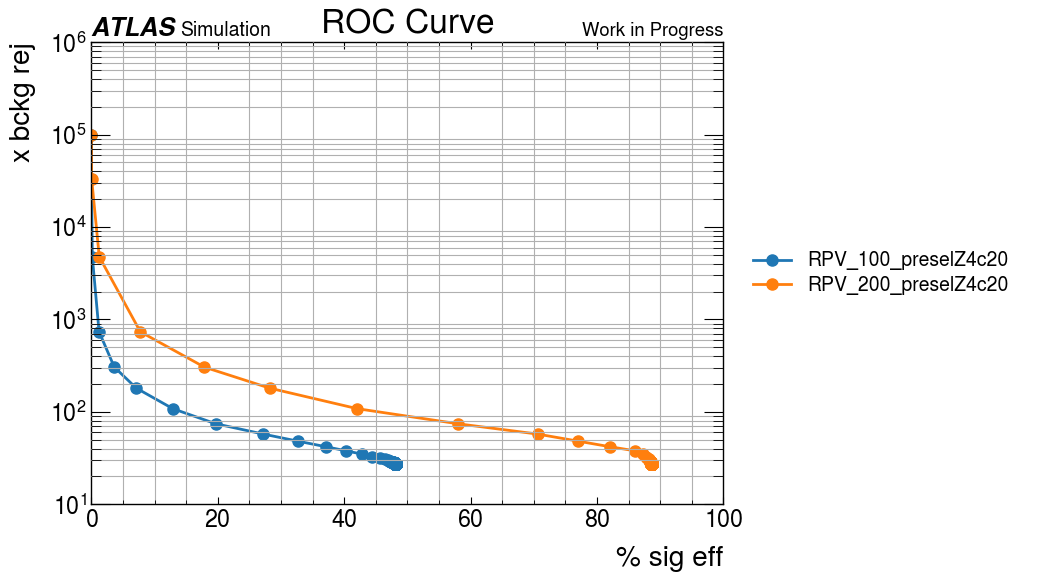

In [26]:
#Defining the binning
minMLPL = min([min(EB_dist_preselZ4c20),min(rpv100_preselZ4c20_dist), min(rpv200_preselZ4c20_dist)])
bin_array = np.linspace(minMLPL, 0, int(0-minMLPL))

#Creating the numpy histograms
signal_100_preselZ4c20_hist, _= np.histogram(rpv100_preselZ4c20_dist, bins = bin_array)
signal_200_preselZ4c20_hist, _= np.histogram(rpv200_preselZ4c20_dist, bins = bin_array)
background_preselZ4c20_hist, _= np.histogram(EB_dist_preselZ4c20, bins = bin_array)

# Calculate cumulative sums from right to left (higher scores to lower)
signal_100_preselZ4c20_cumulative = np.cumsum(signal_100_preselZ4c20_hist[::-1])[::-1]
signal_200_preselZ4c20_cumulative = np.cumsum(signal_200_preselZ4c20_hist[::-1])[::-1]
background_preselZ4c20_cumulative = np.cumsum(background_preselZ4c20_hist[::-1])[::-1]

# Total counts for normalization
total_signal_100_preselZ4c20 = 10000
total_signal_200_preselZ4c20 = 10000
total_background_preselZ4c20 = 100000

# Calculate efficiencies and rejections
signal_100_preselZ4c20_efficiency = signal_100_preselZ4c20_cumulative / total_signal_100_preselZ4c20
signal_200_preselZ4c20_efficiency = signal_200_preselZ4c20_cumulative / total_signal_200_preselZ4c20
background_preselZ4c20_efficiency = background_preselZ4c20_cumulative / total_background_preselZ4c20
background_preselZ4c20_rejection = 1 / background_preselZ4c20_efficiency

#Plotting the ROC curve
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

plt.plot(signal_100_preselZ4c20_efficiency * 100, background_preselZ4c20_rejection, marker='o', linestyle='-', label="RPV_100_preselZ4c20")
plt.plot(signal_200_preselZ4c20_efficiency * 100, background_preselZ4c20_rejection, marker='o', linestyle='-', label="RPV_200_preselZ4c20")

# Adding custom text
text_x = 0.5  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
#plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
plt.yscale("log")
#plt.ylim([-0.1,1])
plt.xlim([0,100])
plt.show()

### HLT_j0_pf_ftf_preselZ**5c20_PhysicsTLA_L14jJ40

In [27]:
# sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

# %load_ext autoreload
# %autoreload

# from mlplGetter_functions import get_MLPL_dist_MC
# from mlplGetter_functions import get_MLPL_dist_EBdata

# hypo = [
#     #[ '6' , 'all' ],
#     [ '5' , 'all' ],
#     #[ '5' , '6' ],
#     #[ '4' , 'all' ],     
#     #[ '4' , '6' ],          
#     #[ '4' , '5' ],          
#     #[ '3' , 'all' ],     
#     #[ '3' , '5' ],
#     #[ '3' , '4' ],         
#     #[ '2' , 'all' ],      
# ]

# print("Getting MLPL (" + hypo[0][0] + ', ' + hypo[0][1] + ') distributions:')
# folder_name = './MLPL_Distributions/mlpl_' + hypo[0][0] + '_' + hypo[0][1] + '/'
# comb_num = int(hypo[0][0])
# if hypo[0][1] == 'all' :
#     num_highest_pt = 555555
# else: 
#     num_highest_pt = int(hypo[0][1])

# presel_pt_threshold = 20

# rpv100_preselZ5c20_dist, rpv100_preselZ5c20_dist_weights, evts_rpv100_preselZ5c20= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# rpv200_preselZ5c20_dist, rpv200_preselZ5c20_dist_weights, evts_rpv200_preselZ5c20= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# EB_dist_preselZ5c20, EB_dist_preselZ5c20_weights, evts_EB_preselZ5c20= get_MLPL_dist_EBdata("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", "/users/maboelela/PhD/DIPZ/Datasets/EnhancedBiasWeights_440499.xml", comb_num, num_highest_pt, presel_pt_threshold)

# preselZ5c20 = {
#     "rpv100_preselZ5c20_dist" : rpv100_preselZ5c20_dist,
#     "rpv100_preselZ5c20_dist_weights" : rpv100_preselZ5c20_dist_weights,
#     "evts_rpv100_preselZ5c20" : evts_rpv100_preselZ5c20,
#     "rpv200_preselZ5c20_dist" : rpv200_preselZ5c20_dist,
#     "rpv200_preselZ5c20_dist_weights" : rpv200_preselZ5c20_dist_weights,
#     "evts_rpv200_preselZ5c20": evts_rpv200_preselZ5c20,
#     "EB_dist_preselZ5c20" : EB_dist_preselZ5c20,
#     "EB_dist_preselZ5c20_weights" : EB_dist_preselZ5c20_weights,
#     "evts_EB_preselZ5c20" : evts_EB_preselZ5c20
# }

# # Save the dictionary to a Pickle file
# with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ5c20.pkl", "wb") as file:
#     pickle.dump(preselZ5c20, file)

In [28]:
# Retrieving relevant lists
with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ5c20.pkl", "rb") as file:
    loaded_data = pickle.load(file)

rpv100_preselZ5c20_dist = loaded_data["rpv100_preselZ5c20_dist"]
rpv100_preselZ5c20_dist_weights = loaded_data["rpv100_preselZ5c20_dist_weights"]
evts_rpv100_preselZ5c20 = loaded_data["evts_rpv100_preselZ5c20"]
rpv200_preselZ5c20_dist = loaded_data["rpv200_preselZ5c20_dist"]
rpv200_preselZ5c20_dist_weights = loaded_data["rpv200_preselZ5c20_dist_weights"]
evts_rpv200_preselZ5c20 = loaded_data["evts_rpv200_preselZ5c20"]
EB_dist_preselZ5c20 = loaded_data["EB_dist_preselZ5c20"]
EB_dist_preselZ5c20_weights = loaded_data["EB_dist_preselZ5c20_weights"]
evts_EB_preselZ5c20 = loaded_data["evts_EB_preselZ5c20"]

#### Discriminant Variable (MLPL) Overlayed Histograms

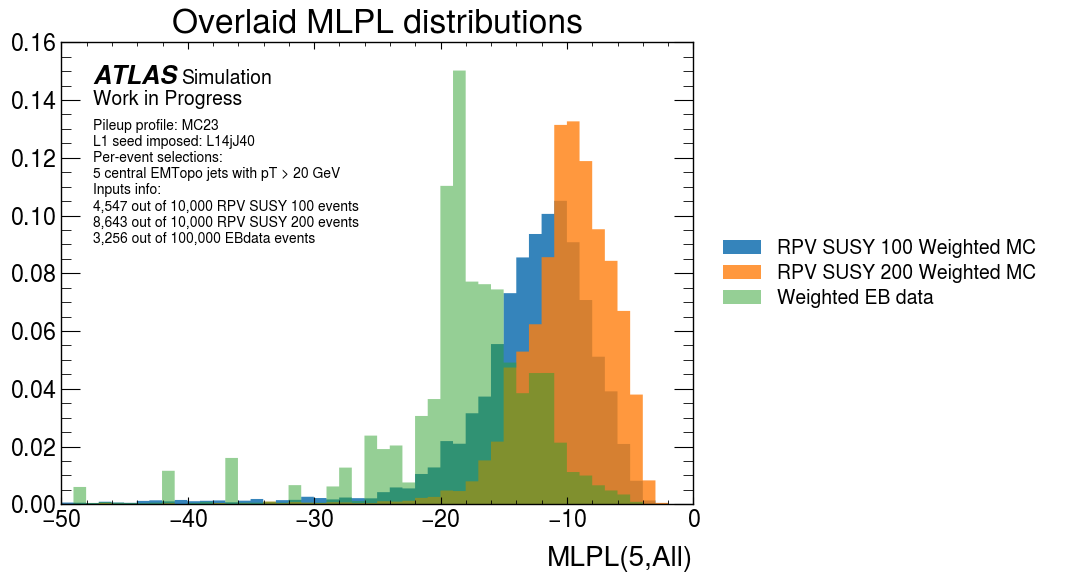

In [29]:
"""MLPL Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

minMLPL = math.ceil(min([min(EB_dist_preselZ5c20),min(rpv100_preselZ5c20_dist), min(rpv200_preselZ5c20_dist)]))
bins = np.linspace(minMLPL, 0, int(0-minMLPL))
plt.hist(rpv100_preselZ5c20_dist, bins, alpha=0.9, label='RPV SUSY 100 Weighted MC', histtype='stepfilled', density=True, weights=rpv100_preselZ5c20_dist_weights)
plt.hist(rpv200_preselZ5c20_dist, bins, alpha=0.8, label='RPV SUSY 200 Weighted MC', histtype='stepfilled', density=True, weights=rpv200_preselZ5c20_dist_weights)
plt.hist(EB_dist_preselZ5c20, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_preselZ5c20_weights)

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Pileup profile: MC23
L1 seed imposed: L14jJ40
Per-event selections:
5 central EMTopo jets with pT > 20 GeV
Inputs info:
4,547 out of 10,000 RPV SUSY 100 events
8,643 out of 10,000 RPV SUSY 200 events
3,256 out of 100,000 EBdata events
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-50,0])
plt.title("Overlaid MLPL distributions")
plt.xlabel("MLPL(5,All)")
#plt.yscale("log")
plt.show()

#### ROC Curve Implementation

/tmp/ipykernel_1153239/1365953914.py:24: RuntimeWarning: divide by zero encountered in divide
  background_preselZ5c20_rejection = 1 / background_preselZ5c20_efficiency


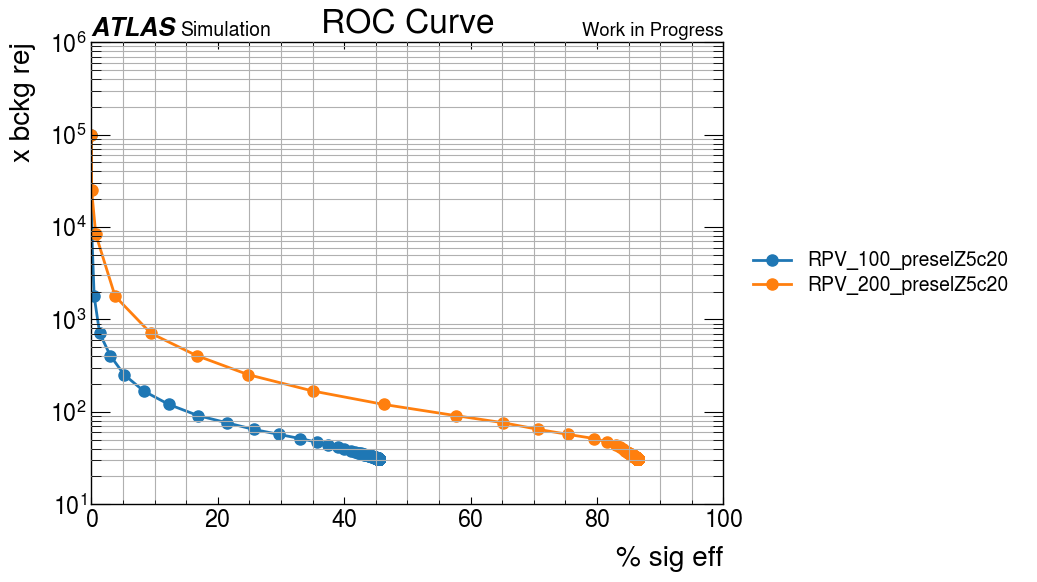

In [30]:
#Defining the binning
minMLPL = min([min(EB_dist_preselZ5c20),min(rpv100_preselZ5c20_dist), min(rpv200_preselZ5c20_dist)])
bin_array = np.linspace(minMLPL, 0, int(0-minMLPL))

#Creating the numpy histograms
signal_100_preselZ5c20_hist, _= np.histogram(rpv100_preselZ5c20_dist, bins = bin_array)
signal_200_preselZ5c20_hist, _= np.histogram(rpv200_preselZ5c20_dist, bins = bin_array)
background_preselZ5c20_hist, _= np.histogram(EB_dist_preselZ5c20, bins = bin_array)

# Calculate cumulative sums from right to left (higher scores to lower)
signal_100_preselZ5c20_cumulative = np.cumsum(signal_100_preselZ5c20_hist[::-1])[::-1]
signal_200_preselZ5c20_cumulative = np.cumsum(signal_200_preselZ5c20_hist[::-1])[::-1]
background_preselZ5c20_cumulative = np.cumsum(background_preselZ5c20_hist[::-1])[::-1]

# Total counts for normalization
total_signal_100_preselZ5c20 = 10000
total_signal_200_preselZ5c20 = 10000
total_background_preselZ5c20 = 100000

# Calculate efficiencies and rejections
signal_100_preselZ5c20_efficiency = signal_100_preselZ5c20_cumulative / total_signal_100_preselZ5c20
signal_200_preselZ5c20_efficiency = signal_200_preselZ5c20_cumulative / total_signal_200_preselZ5c20
background_preselZ5c20_efficiency = background_preselZ5c20_cumulative / total_background_preselZ5c20
background_preselZ5c20_rejection = 1 / background_preselZ5c20_efficiency

#Plotting the ROC curve
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

plt.plot(signal_100_preselZ5c20_efficiency * 100, background_preselZ5c20_rejection, marker='o', linestyle='-', label="RPV_100_preselZ5c20")
plt.plot(signal_200_preselZ5c20_efficiency * 100, background_preselZ5c20_rejection, marker='o', linestyle='-', label="RPV_200_preselZ5c20")

# Adding custom text
text_x = 0.5  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
#plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
plt.yscale("log")
#plt.ylim([-0.1,1])
plt.xlim([0,100])
plt.show()

### HLT_j0_pf_ftf_preselZ**6c20_PhysicsTLA_L14jJ40

In [31]:
# sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

# %load_ext autoreload
# %autoreload

# from mlplGetter_functions import get_MLPL_dist_MC
# from mlplGetter_functions import get_MLPL_dist_EBdata

# hypo = [
#     [ '6' , 'all' ],
#     #[ '5' , 'all' ],
#     #[ '5' , '6' ],
#     #[ '4' , 'all' ],     
#     #[ '4' , '6' ],          
#     #[ '4' , '5' ],          
#     #[ '3' , 'all' ],     
#     #[ '3' , '5' ],
#     #[ '3' , '4' ],         
#     #[ '2' , 'all' ],      
# ]

# print("Getting MLPL (" + hypo[0][0] + ', ' + hypo[0][1] + ') distributions:')
# folder_name = './MLPL_Distributions/mlpl_' + hypo[0][0] + '_' + hypo[0][1] + '/'
# comb_num = int(hypo[0][0])
# if hypo[0][1] == 'all' :
#     num_highest_pt = 555555
# else: 
#     num_highest_pt = int(hypo[0][1])

# presel_pt_threshold = 20

# rpv100_preselZ6c20_dist, rpv100_preselZ6c20_dist_weights, evts_rpv100_preselZ6c20= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# rpv200_preselZ6c20_dist, rpv200_preselZ6c20_dist_weights, evts_rpv200_preselZ6c20= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# EB_dist_preselZ6c20, EB_dist_preselZ6c20_weights, evts_EB_preselZ6c20= get_MLPL_dist_EBdata("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", "/users/maboelela/PhD/DIPZ/Datasets/EnhancedBiasWeights_440499.xml", comb_num, num_highest_pt, presel_pt_threshold)

# preselZ6c20 = {
#     "rpv100_preselZ6c20_dist" : rpv100_preselZ6c20_dist,
#     "rpv100_preselZ6c20_dist_weights" : rpv100_preselZ6c20_dist_weights,
#     "evts_rpv100_preselZ6c20" : evts_rpv100_preselZ6c20,
#     "rpv200_preselZ6c20_dist" : rpv200_preselZ6c20_dist,
#     "rpv200_preselZ6c20_dist_weights" : rpv200_preselZ6c20_dist_weights,
#     "evts_rpv200_preselZ6c20": evts_rpv200_preselZ6c20,
#     "EB_dist_preselZ6c20" : EB_dist_preselZ6c20,
#     "EB_dist_preselZ6c20_weights" : EB_dist_preselZ6c20_weights,
#     "evts_EB_preselZ6c20" : evts_EB_preselZ6c20
# }

# # Save the dictionary to a Pickle file
# with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ6c20.pkl", "wb") as file:
#     pickle.dump(preselZ6c20, file)

In [32]:
# Retrieving relevant lists
with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ6c20.pkl", "rb") as file:
    loaded_data = pickle.load(file)

rpv100_preselZ6c20_dist = loaded_data["rpv100_preselZ6c20_dist"]
rpv100_preselZ6c20_dist_weights = loaded_data["rpv100_preselZ6c20_dist_weights"]
evts_rpv100_preselZ6c20 = loaded_data["evts_rpv100_preselZ6c20"]
rpv200_preselZ6c20_dist = loaded_data["rpv200_preselZ6c20_dist"]
rpv200_preselZ6c20_dist_weights = loaded_data["rpv200_preselZ6c20_dist_weights"]
evts_rpv200_preselZ6c20 = loaded_data["evts_rpv200_preselZ6c20"]
EB_dist_preselZ6c20 = loaded_data["EB_dist_preselZ6c20"]
EB_dist_preselZ6c20_weights = loaded_data["EB_dist_preselZ6c20_weights"]
evts_EB_preselZ6c20 = loaded_data["evts_EB_preselZ6c20"]

#### Discriminant Variable (MLPL) Overlayed Histograms

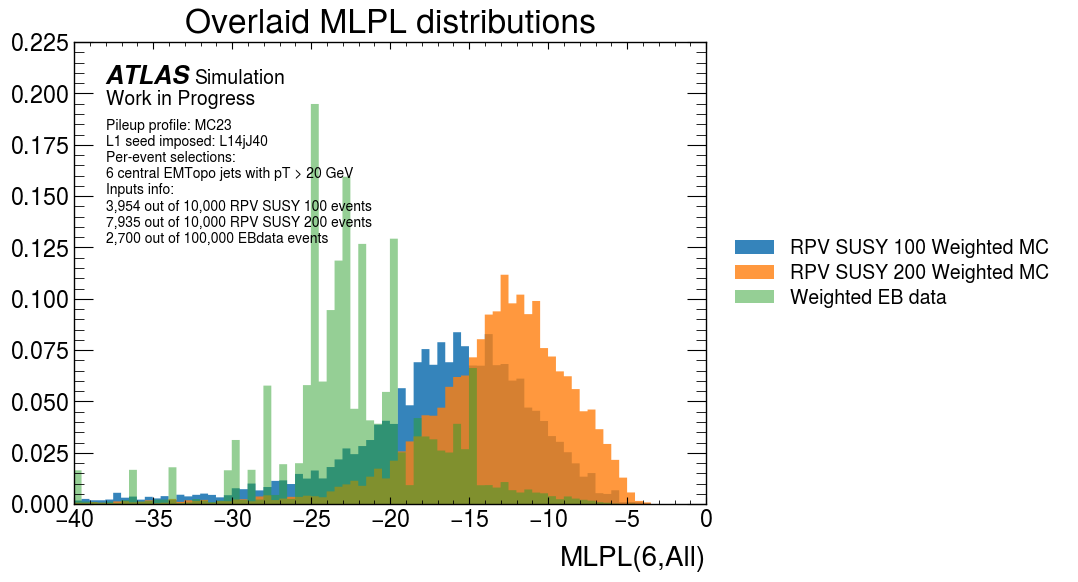

In [33]:
"""MLPL Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

minMLPL = min([min(EB_dist_preselZ6c20),min(rpv100_preselZ6c20_dist), min(rpv200_preselZ6c20_dist)])
bins = np.linspace(minMLPL, 0, int(0-minMLPL) * 2)
plt.hist(rpv100_preselZ6c20_dist, bins, alpha=0.9, label='RPV SUSY 100 Weighted MC', histtype='stepfilled', density=True, weights=rpv100_preselZ6c20_dist_weights)
plt.hist(rpv200_preselZ6c20_dist, bins, alpha=0.8, label='RPV SUSY 200 Weighted MC', histtype='stepfilled', density=True, weights=rpv200_preselZ6c20_dist_weights)
plt.hist(EB_dist_preselZ6c20, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_preselZ6c20_weights)

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Pileup profile: MC23
L1 seed imposed: L14jJ40
Per-event selections:
6 central EMTopo jets with pT > 20 GeV
Inputs info:
3,954 out of 10,000 RPV SUSY 100 events
7,935 out of 10,000 RPV SUSY 200 events
2,700 out of 100,000 EBdata events
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-40,0])
plt.title("Overlaid MLPL distributions")
plt.xlabel("MLPL(6,All)")
plt.show()

#### ROC Curve Implementation

/tmp/ipykernel_1153239/2275824369.py:24: RuntimeWarning: divide by zero encountered in divide
  background_preselZ6c20_rejection = 1 / background_preselZ6c20_efficiency


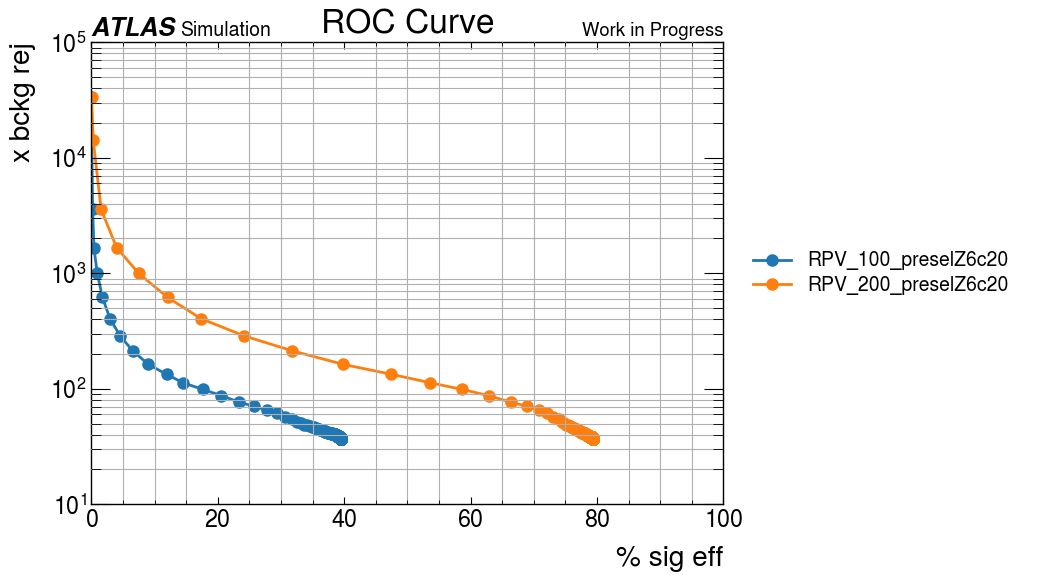

In [34]:
#Defining the binning
minMLPL = min([min(EB_dist_preselZ6c20),min(rpv100_preselZ6c20_dist), min(rpv200_preselZ6c20_dist)])
bin_array = np.linspace(minMLPL, 0, int(0-minMLPL))

#Creating the numpy histograms
signal_100_preselZ6c20_hist, _= np.histogram(rpv100_preselZ6c20_dist, bins = bin_array)
signal_200_preselZ6c20_hist, _= np.histogram(rpv200_preselZ6c20_dist, bins = bin_array)
background_preselZ6c20_hist, _= np.histogram(EB_dist_preselZ6c20, bins = bin_array)

# Calculate cumulative sums from right to left (higher scores to lower)
signal_100_preselZ6c20_cumulative = np.cumsum(signal_100_preselZ6c20_hist[::-1])[::-1]
signal_200_preselZ6c20_cumulative = np.cumsum(signal_200_preselZ6c20_hist[::-1])[::-1]
background_preselZ6c20_cumulative = np.cumsum(background_preselZ6c20_hist[::-1])[::-1]

# Total counts for normalization
total_signal_100_preselZ6c20 = 10000
total_signal_200_preselZ6c20 = 10000
total_background_preselZ6c20 = 100000

# Calculate efficiencies and rejections
signal_100_preselZ6c20_efficiency = signal_100_preselZ6c20_cumulative / total_signal_100_preselZ6c20
signal_200_preselZ6c20_efficiency = signal_200_preselZ6c20_cumulative / total_signal_200_preselZ6c20
background_preselZ6c20_efficiency = background_preselZ6c20_cumulative / total_background_preselZ6c20
background_preselZ6c20_rejection = 1 / background_preselZ6c20_efficiency

#Plotting the ROC curve
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

plt.plot(signal_100_preselZ6c20_efficiency * 100, background_preselZ6c20_rejection, marker='o', linestyle='-', label="RPV_100_preselZ6c20")
plt.plot(signal_200_preselZ6c20_efficiency * 100, background_preselZ6c20_rejection, marker='o', linestyle='-', label="RPV_200_preselZ6c20")

# Adding custom text
text_x = 0.5  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
#plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
plt.yscale("log")
#plt.ylim([-0.1,1])
plt.xlim([0,100])
plt.show()

### HLT_j0_pf_ftf_preselZ**6c25_PhysicsTLA_L14jJ40

In [35]:
# sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

# %load_ext autoreload
# %autoreload

# from mlplGetter_functions import get_MLPL_dist_MC
# from mlplGetter_functions import get_MLPL_dist_EBdata

# hypo = [
#     [ '6' , 'all' ],
#     #[ '5' , 'all' ],
#     #[ '5' , '6' ],
#     #[ '4' , 'all' ],     
#     #[ '4' , '6' ],          
#     #[ '4' , '5' ],          
#     #[ '3' , 'all' ],     
#     #[ '3' , '5' ],
#     #[ '3' , '4' ],         
#     #[ '2' , 'all' ],      
# ]

# print("Getting MLPL (" + hypo[0][0] + ', ' + hypo[0][1] + ') distributions:')
# folder_name = './MLPL_Distributions/mlpl_' + hypo[0][0] + '_' + hypo[0][1] + '/'
# comb_num = int(hypo[0][0])
# if hypo[0][1] == 'all' :
#     num_highest_pt = 555555
# else: 
#     num_highest_pt = int(hypo[0][1])

# presel_pt_threshold = 25

# rpv100_preselZ6c25_dist, rpv100_preselZ6c25_dist_weights, evts_rpv100_preselZ6c25= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# rpv200_preselZ6c25_dist, rpv200_preselZ6c25_dist_weights, evts_rpv200_preselZ6c25= get_MLPL_dist_MC("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", comb_num, num_highest_pt, presel_pt_threshold)
# EB_dist_preselZ6c25, EB_dist_presel6c25_weights, evts_EB_preselZ6c25= get_MLPL_dist_EBdata("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", "/users/maboelela/PhD/DIPZ/Datasets/EnhancedBiasWeights_440499.xml", comb_num, num_highest_pt, presel_pt_threshold)

# preselZ6c25 = {
#     "rpv100_preselZ6c25_dist" : rpv100_preselZ6c25_dist,
#     "rpv100_preselZ6c25_dist_weights" : rpv100_preselZ6c25_dist_weights,
#     "evts_rpv100_preselZ6c25" : evts_rpv100_preselZ6c25,
#     "rpv200_preselZ6c25_dist" : rpv200_preselZ6c25_dist,
#     "rpv200_preselZ6c25_dist_weights" : rpv200_preselZ6c25_dist_weights,
#     "evts_rpv200_preselZ6c25": evts_rpv200_preselZ6c25,
#     "EB_dist_preselZ6c25" : EB_dist_preselZ6c25,
#     "EB_dist_preselZ6c25_weights" : EB_dist_preselZ6c25_weights,
#     "evts_EB_preselZ6c25" : evts_EB_preselZ6c25
# }

# # Save the dictionary to a Pickle file
# with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ6c25.pkl", "wb") as file:
#     pickle.dump(preselZ6c25, file)

In [36]:
# Retrieving relevant lists
with open("/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies/pickles/preselZ6c25.pkl", "rb") as file:
    loaded_data = pickle.load(file)

rpv100_preselZ6c25_dist = loaded_data["rpv100_preselZ6c25_dist"]
rpv100_preselZ6c25_dist_weights = loaded_data["rpv100_preselZ6c25_dist_weights"]
evts_rpv100_preselZ6c25 = loaded_data["evts_rpv100_preselZ6c25"]
rpv200_preselZ6c25_dist = loaded_data["rpv200_preselZ6c25_dist"]
rpv200_preselZ6c25_dist_weights = loaded_data["rpv200_preselZ6c25_dist_weights"]
evts_rpv200_preselZ6c25 = loaded_data["evts_rpv200_preselZ6c25"]
EB_dist_preselZ6c25 = loaded_data["EB_dist_preselZ6c25"]
EB_dist_preselZ6c25_weights = loaded_data["EB_dist_preselZ6c25_weights"]
evts_EB_preselZ6c25 = loaded_data["evts_EB_preselZ6c25"]

#### Discriminant Variable (MLPL) Overlayed Histograms

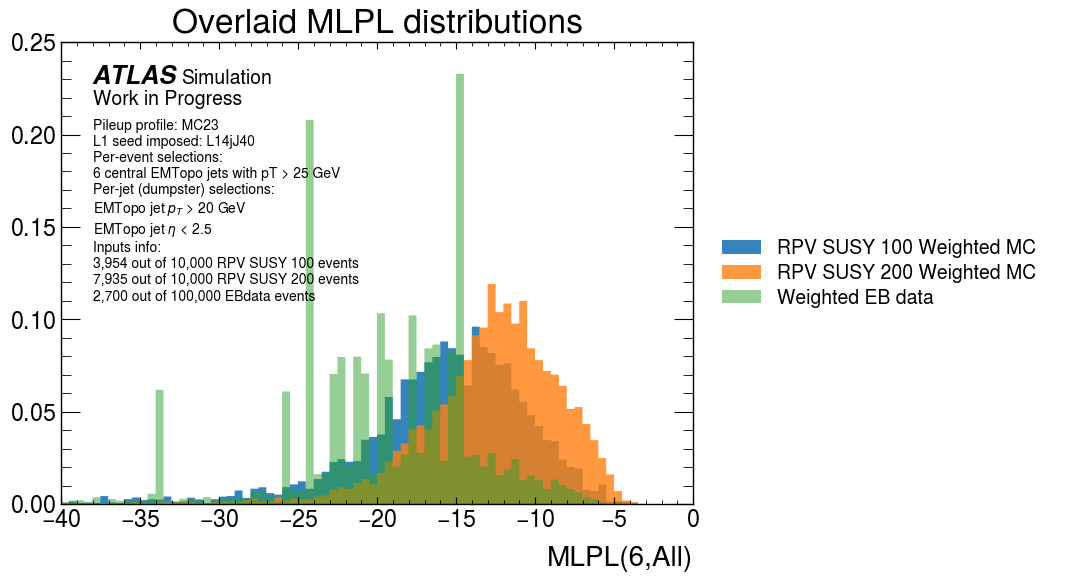

In [37]:
"""MLPL Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

minMLPL = min([min(EB_dist_preselZ6c25),min(rpv100_preselZ6c25_dist), min(rpv200_preselZ6c25_dist)])
bins = np.linspace(minMLPL, 0, int(0-minMLPL) * 2)
plt.hist(rpv100_preselZ6c25_dist, bins, alpha=0.9, label='RPV SUSY 100 Weighted MC', histtype='stepfilled', density=True, weights=rpv100_preselZ6c25_dist_weights)
plt.hist(rpv200_preselZ6c25_dist, bins, alpha=0.8, label='RPV SUSY 200 Weighted MC', histtype='stepfilled', density=True, weights=rpv200_preselZ6c25_dist_weights)
plt.hist(EB_dist_preselZ6c25, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_preselZ6c25_weights)

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Pileup profile: MC23
L1 seed imposed: L14jJ40
Per-event selections:
6 central EMTopo jets with pT > 25 GeV
Per-jet (dumpster) selections: 
EMTopo jet $p_T$ > 20 GeV 
EMTopo jet $\eta$ < 2.5
Inputs info:
3,954 out of 10,000 RPV SUSY 100 events
7,935 out of 10,000 RPV SUSY 200 events
2,700 out of 100,000 EBdata events
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-40,0])
plt.title("Overlaid MLPL distributions")
plt.xlabel("MLPL(6,All)")
plt.show()

#### ROC Curve Implementation

/tmp/ipykernel_1153239/735949707.py:24: RuntimeWarning: divide by zero encountered in divide
  background_preselZ6c25_rejection = 1 / background_preselZ6c25_efficiency


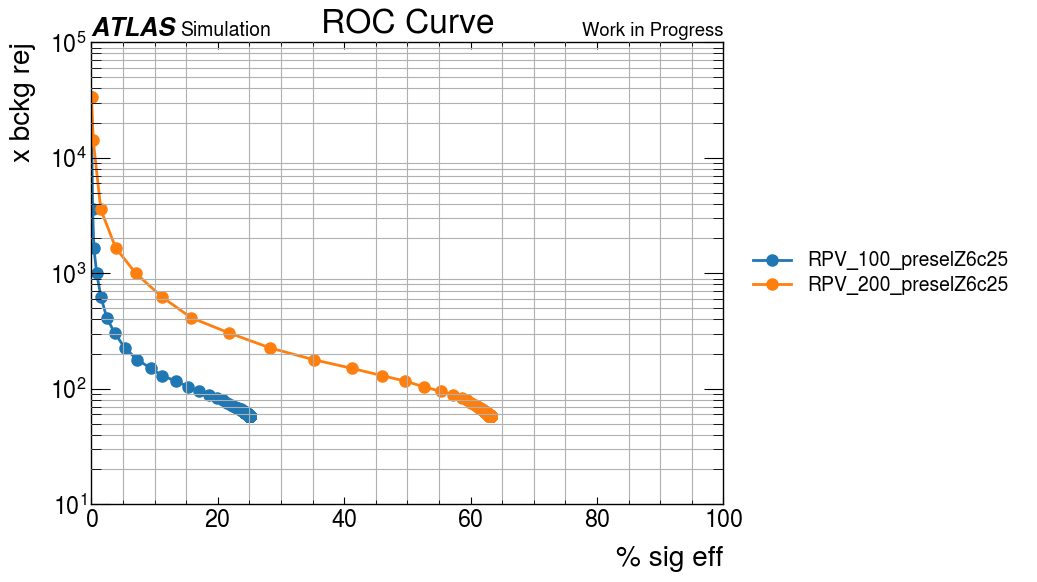

In [38]:
#Defining the binning
minMLPL = min([min(EB_dist_preselZ6c25),min(rpv100_preselZ6c25_dist), min(rpv200_preselZ6c25_dist)])
bin_array = np.linspace(minMLPL, 0, int(0-minMLPL))

#Creating the numpy histograms
signal_100_preselZ6c25_hist, _= np.histogram(rpv100_preselZ6c25_dist, bins = bin_array)
signal_200_preselZ6c25_hist, _= np.histogram(rpv200_preselZ6c25_dist, bins = bin_array)
background_preselZ6c25_hist, _= np.histogram(EB_dist_preselZ6c25, bins = bin_array)

# Calculate cumulative sums from right to left (higher scores to lower)
signal_100_preselZ6c25_cumulative = np.cumsum(signal_100_preselZ6c25_hist[::-1])[::-1]
signal_200_preselZ6c25_cumulative = np.cumsum(signal_200_preselZ6c25_hist[::-1])[::-1]
background_preselZ6c25_cumulative = np.cumsum(background_preselZ6c25_hist[::-1])[::-1]

# Total counts for normalization
total_signal_100_preselZ6c25 = 10000
total_signal_200_preselZ6c25 = 10000
total_background_preselZ6c25 = 100000

# Calculate efficiencies and rejections
signal_100_preselZ6c25_efficiency = signal_100_preselZ6c25_cumulative / total_signal_100_preselZ6c25
signal_200_preselZ6c25_efficiency = signal_200_preselZ6c25_cumulative / total_signal_200_preselZ6c25
background_preselZ6c25_efficiency = background_preselZ6c25_cumulative / total_background_preselZ6c25
background_preselZ6c25_rejection = 1 / background_preselZ6c25_efficiency

#Plotting the ROC curve
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

plt.plot(signal_100_preselZ6c25_efficiency * 100, background_preselZ6c25_rejection, marker='o', linestyle='-', label="RPV_100_preselZ6c25")
plt.plot(signal_200_preselZ6c25_efficiency * 100, background_preselZ6c25_rejection, marker='o', linestyle='-', label="RPV_200_preselZ6c25")

# Adding custom text
text_x = 0.5  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
#plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
plt.yscale("log")
#plt.ylim([-0.1,1])
plt.xlim([0,100])
plt.show()

### HLT_6j20_pf_ftf_preselZ**6c25_PhysicsTLA_L14jJ40

In [39]:
# sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

# %load_ext autoreload
# %autoreload

# from mlplGetter_functions import get_MLPL_dist_MC
# from mlplGetter_functions import get_MLPL_dist_MC_all
# from mlplGetter_functions import get_MLPL_dist_EBdata

# hypo = [
#     [ '6' , 'all' ],
#     #[ '5' , 'all' ],
#     #[ '5' , '6' ],
#     #[ '4' , 'all' ],     
#     #[ '4' , '6' ],          
#     #[ '4' , '5' ],          
#     #[ '3' , 'all' ],     
#     #[ '3' , '5' ],
#     #[ '3' , '4' ],         
#     #[ '2' , 'all' ],      
# ]

# print("Getting MLPL (" + hypo[0][0] + ', ' + hypo[0][1] + ') distributions:')
# folder_name = './MLPL_Distributions/mlpl_' + hypo[0][0] + '_' + hypo[0][1] + '/'
# comb_num = int(hypo[0][0])
# if hypo[0][1] == 'all' :
#     num_highest_pt = 555555
# else: 
#     num_highest_pt = int(hypo[0][1])

# presel_pt_threshold = 25
# pflow_jet_number = 6
# pflow_pt_cut = 20 

# rpv100_preselZ6c25_main6j20_dist, rpv100_preselZ6c25_main6j20_dist_weights, = get_MLPL_dist_MC_all("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_100_L14jJ40_all.h5", comb_num, num_highest_pt, presel_pt_threshold, pflow_jet_number, pflow_pt_cut)
# rpv200_preselZ6c25_main6j20_dist, rpv200_preselZ6c25_main6j20_dist_weights, = get_MLPL_dist_MC_all("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_all.h5", comb_num, num_highest_pt, presel_pt_threshold, pflow_jet_number, pflow_pt_cut)
# #EB_dist_preselZ6c25, EB_dist_preselZ6c25_weights = get_MLPL_dist_EBdata("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L14jJ40.h5", "/users/maboelela/PhD/DIPZ/Datasets/EnhancedBiasWeights_440499.xml", comb_num, num_highest_pt, presel_pt_threshold)



#### Discriminant Variable (MLPL) Overlayed Histograms

In [40]:
# """MLPL Overlayed Histograms"""
# #ATLAS Style
# plt.style.use(hep.style.ATLAS)
# plt.figure(figsize=(8, 6))
# ax = plt.gca()
# hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

# minMLPL = min([min(EB_dist_preselZ6c25),min(rpv100_preselZ6c25_main6j20_dist), min(rpv200_preselZ6c25_main6j20_dist)
#                #,min(jz0_dist),min(jz1_dist),min(jz2_dist),min(jz3_dist),min(jz4_dist),min(jz5_dist)
#                 ])
# bins = np.linspace(minMLPL, 0, int(0-minMLPL) * 2)
# plt.hist(rpv100_preselZ6c25_main6j20_dist, bins, alpha=0.9, label='RPV SUSY 100 Weighted MC', histtype='stepfilled', density=True, weights=rpv100_preselZ6c25_main6j20_dist_weights)
# plt.hist(rpv200_preselZ6c25_main6j20_dist, bins, alpha=0.8, label='RPV SUSY 200 Weighted MC', histtype='stepfilled', density=True, weights=rpv200_preselZ6c25_main6j20_dist_weights)
# plt.hist(EB_dist_preselZ6c25, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_preselZ6c25_weights)
# #plt.hist(jz0_dist, bins, alpha=1, label='JZ0', histtype='step')
# #plt.hist(jz1_dist, bins, alpha=1, label='JZ1', histtype='step')
# #plt.hist(jz2_dist, bins, alpha=1, label='JZ2', histtype='step')
# #plt.hist(jz3_dist, bins, alpha=1, label='JZ3', histtype='step')
# #plt.hist(jz4_dist, bins, alpha=1, label='JZ4', histtype='step')
# #plt.hist(jz5_dist, bins, alpha=1, label='JZ5', histtype='step')

# # Adding custom text
# text_x = 0.05  # x position of the text, adjust as necessary
# text_y = 0.87  # y position of the text, adjust as necessary
# analysis_info = """
# Pileup profile: MC23
# L1 seed imposed: L14jJ40
# Per-event selections:
# 6 central EMTopo jets with pT > 25 GeV
# 6 
# Per-jet (dumpster) selections: 
# EMTopo jet $p_T$ > 20 GeV 
# EMTopo jet $\eta$ < 2.5
# Inputs info:
# 3,954 out of 10,000 RPV SUSY 100 events
# 7,935 out of 10,000 RPV SUSY 200 events
# 2,700 out of 100,000 EBdata events
# """
# plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)


# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim([-40,0])
# plt.title("Overlaid MLPL distributions")
# plt.xlabel("MLPL(6,All)")
# plt.show()

#### ROC Curve Implementation

In [41]:
# #Defining the binning
# minMLPL = min([min(EB_dist_preselZ6c25),min(rpv100_preselZ6c25_main6j20_dist), min(rpv200_preselZ6c25_main6j20_dist)
#                #min(jz0_dist),min(jz1_dist),min(jz2_dist),min(jz3_dist),min(jz4_dist),min(jz5_dist)
#                 ])
# bin_array = np.linspace(minMLPL, 0, int(0-minMLPL))

# #Creating the numpy histograms
# signal_100_preselZ6c25_main6j20_hist, _= np.histogram(rpv100_preselZ6c25_main6j20_dist, bins = bin_array)
# signal_200_preselZ6c25_main6j20_hist, _= np.histogram(rpv200_preselZ6c25_main6j20_dist, bins = bin_array)
# background_preselZ6c25_hist, _= np.histogram(EB_dist_preselZ6c25, bins = bin_array)

# # Calculate cumulative sums from right to left (higher scores to lower)
# signal_100_preselZ6c25_main6j20_cumulative = np.cumsum(signal_100_preselZ6c25_main6j20_hist[::-1])[::-1]
# signal_200_preselZ6c25_main6j20_cumulative = np.cumsum(signal_200_preselZ6c25_main6j20_hist[::-1])[::-1]
# background_preselZ6c25_cumulative = np.cumsum(background_preselZ6c25_hist[::-1])[::-1]

# # Total counts for normalization
# #total_signal_100_preselZ6c25 = np.sum(signal_100_preselZ6c25_hist)
# total_signal_100_preselZ6c25_main6j20 = 10000
# #total_signal_200_preselZ6c25 = np.sum(signal_200_preselZ6c25_hist)
# total_signal_200_preselZ6c25_main6j20 = 10000
# #total_background_preselZ6c25 = np.sum(background_preselZ6c25_hist)
# total_background_preselZ6c25 = 100000

# # Calculate efficiencies and rejections
# signal_100_preselZ6c25_main6j20_efficiency = signal_100_preselZ6c25_main6j20_cumulative / total_signal_100_preselZ6c25_main6j20
# signal_200_preselZ6c25_main6j20_efficiency = signal_200_preselZ6c25_main6j20_cumulative / total_signal_200_preselZ6c25_main6j20
# background_preselZ6c25_efficiency = background_preselZ6c25_cumulative / total_background_preselZ6c25
# background_preselZ6c25_rejection = 1 / background_preselZ6c25_efficiency

# #Plotting the ROC curve
# #ATLAS Style
# plt.style.use(hep.style.ATLAS)
# plt.figure(figsize=(8, 6))
# ax = plt.gca()
# hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

# plt.plot(signal_100_preselZ6c25_main6j20_efficiency * 100, background_preselZ6c25_rejection, marker='o', linestyle='-', label="RPV_100_preselZ6c25_main6j20")
# plt.plot(signal_200_preselZ6c25_main6j20_efficiency * 100, background_preselZ6c25_rejection, marker='o', linestyle='-', label="RPV_200_preselZ6c25_main6j20")

# # Adding custom text
# text_x = 0.5  # x position of the text, adjust as necessary
# text_y = 0.87  # y position of the text, adjust as necessary
# analysis_info = """
# Bckg rej = 1 / Bckg eff
# """
# #plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('ROC Curve')
# plt.xlabel('% sig eff')
# plt.ylabel('x bckg rej')
# plt.grid(which = "minor")
# plt.minorticks_on()
# plt.yscale("log")
# #plt.ylim([-0.1,1])
# plt.xlim([0,100])
# plt.show()

## ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Displaying Combined ROC Curves

### 200 GeV Mass Point

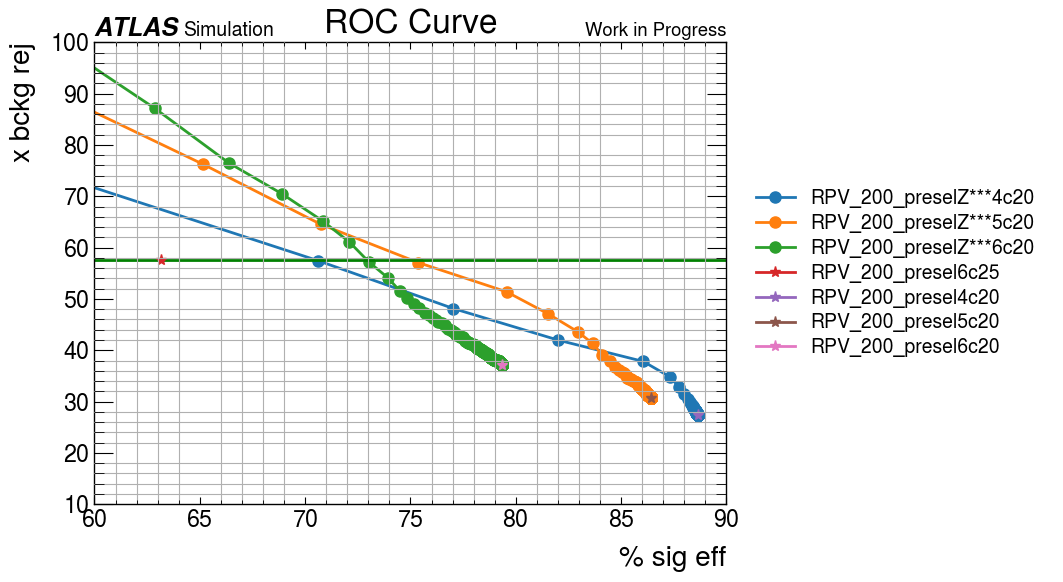

In [60]:
""" RPV_SUSY_200 """
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

#plt.plot(signal_200_preselZ6c25_efficiency * 100, background_preselZ6c25_rejection, marker='o', linestyle='-', label="RPV_200_preselZ***6c25")
plt.plot(signal_200_preselZ4c20_efficiency * 100, background_preselZ4c20_rejection, marker='o', linestyle='-', label="RPV_200_preselZ***4c20")
plt.plot(signal_200_preselZ5c20_efficiency * 100, background_preselZ5c20_rejection, marker='o', linestyle='-', label="RPV_200_preselZ***5c20")
plt.plot(signal_200_preselZ6c20_efficiency * 100, background_preselZ6c20_rejection, marker='o', linestyle='-', label="RPV_200_preselZ***6c20")
plt.axhline(y=background_presel6c25_rejection, color='green', linestyle='-', linewidth=2)
plt.plot(signal_200_presel6c25_efficiency * 100, background_presel6c25_rejection, marker='*', linestyle='-', label="RPV_200_presel6c25")
plt.plot(signal_200_presel4c20_efficiency * 100, background_presel4c20_rejection, marker='*', linestyle='-', label="RPV_200_presel4c20")
plt.plot(signal_200_presel5c20_efficiency * 100, background_presel5c20_rejection, marker='*', linestyle='-', label="RPV_200_presel5c20")
plt.plot(signal_200_presel6c20_efficiency * 100, background_presel6c20_rejection, marker='*', linestyle='-', label="RPV_200_presel6c20")


# Adding custom text
text_x = 0.5  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
#plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
#plt.yscale("log")
plt.ylim([10,100])
plt.xlim([60,90])
plt.show()

### 100 GeV Mass Point

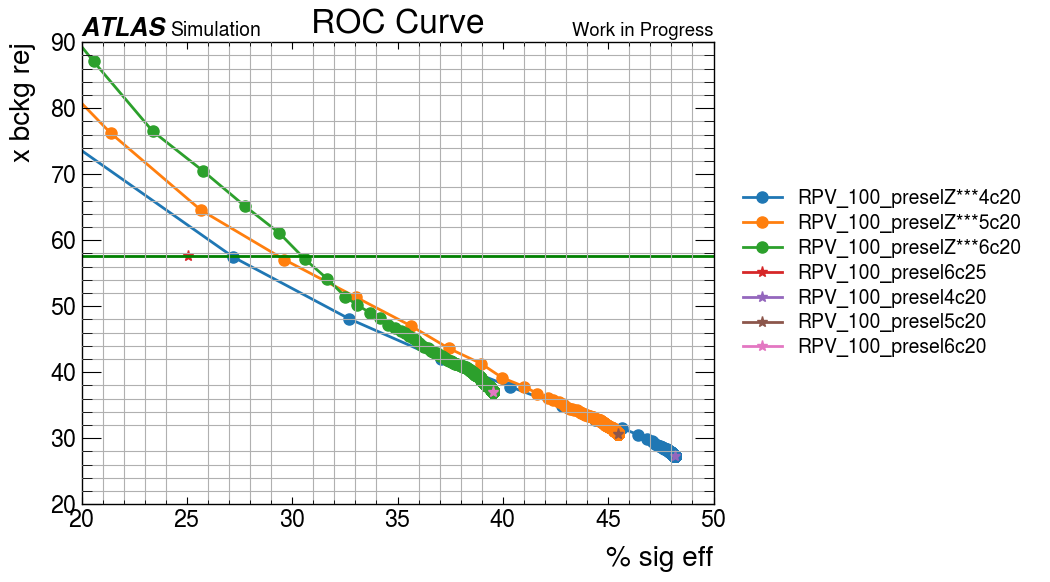

In [61]:
""" RPV_SUSY_100 """
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

#plt.plot(signal_100_preselZ6c25_efficiency * 100, background_preselZ6c25_rejection, marker='o', linestyle='-', label="RPV_100_preselZ***6c25")
plt.plot(signal_100_preselZ4c20_efficiency * 100, background_preselZ4c20_rejection, marker='o', linestyle='-', label="RPV_100_preselZ***4c20")
plt.plot(signal_100_preselZ5c20_efficiency * 100, background_preselZ5c20_rejection, marker='o', linestyle='-', label="RPV_100_preselZ***5c20")
plt.plot(signal_100_preselZ6c20_efficiency * 100, background_preselZ6c20_rejection, marker='o', linestyle='-', label="RPV_100_preselZ***6c20")
plt.plot(signal_100_presel6c25_efficiency * 100, background_presel6c25_rejection, marker='*', label="RPV_100_presel6c25")
plt.axhline(y=background_presel6c25_rejection, color='green', linestyle='-', linewidth=2)
plt.plot(signal_100_presel4c20_efficiency * 100, background_presel4c20_rejection, marker='*', label="RPV_100_presel4c20")
plt.plot(signal_100_presel5c20_efficiency * 100, background_presel5c20_rejection, marker='*', label="RPV_100_presel5c20")
plt.plot(signal_100_presel6c20_efficiency * 100, background_presel6c20_rejection, marker='*', label="RPV_100_presel6c20")

# Adding custom text
text_x = 0.5  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
#plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
#plt.yscale("log")
plt.ylim([20,90])
plt.xlim([20,50])
plt.show()

## ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## WP (Working Point) Manipulations

In [44]:
def round_to_n_significant_figures(x, n):
    if x == 0:
        return 0
    else:
        return round(x, -int(np.floor(np.log10(abs(x)))) + (n - 1))

def get_WP_wrt_SigEff(sig_dist, presel_eff_percent):
    
    sig_dist = np.array(sig_dist)
    min_val = min(sig_dist)
    wps_array = np.linspace(min_val, 0, int(0-min_val) * 100)
    
    vectorized_round = np.vectorize(round_to_n_significant_figures)
    wps_array = vectorized_round(wps_array, 3)
    
    wp = 0
    eff = round_to_n_significant_figures(presel_eff_percent/100,3)

    for x in wps_array:
        wp_eff = len(sig_dist[sig_dist > x]) / 10000
        wp_eff = round_to_n_significant_figures(wp_eff,3)
        if (wp_eff == eff): 
                wp = x
                break

    return wp

def get_sigeff(sig_dist, sigeff):
    sig_dist = np.array(sig_dist)
    wp_eff = len(sig_dist[sig_dist > sigeff]) / 10000 * 100
    return wp_eff

## ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## ATR-29896

### Studying the events lost due to DIPZ

Let's focus on the 200 GeV mass point sample (which is a Monte-Carlo sample containing 10,000 events). When relaxing the 6j25-preselection to a 5j20-preselection, we gain 2,326 events that survive both L14jJ40 and presel5c20 but not presel6c25

In [45]:
print("Number of events gained from relaxing the preselections: " + str(len(set(evts_rpv_200_presel5c20) - set(evts_rpv_200_presel6c25))))

Number of events gained from relaxing the preselections: 2326


Let's focus on the tighter DIPZ WP, that is Z134. When requiring that on top of the 5j20-preselection, we lose 1375 events that doesn't pass the DIPZ requirement of having an MLPL of at least -13.4 or more

In [46]:
evts_passing_Z142_rpv200_preselZ5c20 = []
evts_passing_Z134_rpv200_preselZ5c20 = []

for i in np.arange(0,len(rpv200_preselZ5c20_dist),1):
    if rpv200_preselZ5c20_dist[i] > -1 * ( 142 / 10):
        evts_passing_Z142_rpv200_preselZ5c20.append(evts_rpv200_preselZ5c20[i])
    if rpv200_preselZ5c20_dist[i] > -1 * ( 134 / 10):
        evts_passing_Z134_rpv200_preselZ5c20.append(evts_rpv200_preselZ5c20[i])
        

In [47]:
print("Number of events lost after adding the DIPZ preselection: " + str(len(set(evts_rpv_200_presel5c20) - set(evts_passing_Z134_rpv200_preselZ5c20))))

Number of events lost after adding the DIPZ preselection: 1375


In [48]:
s = set(evts_rpv_200_presel5c20) - set(evts_passing_Z134_rpv200_preselZ5c20)
#print("The event IDs of those lost events: " + str(s))

In [49]:
# print ("Printing the DIPZ event displays of those lost events...")
# # Define paths and load data
# name = "/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5"
# data = File(name, 'r')
# jets = np.asarray(data['jets'])
# uniques = np.unique(jets["eventNumber"])

# # PDF output file
# output_pdf_path = "/users/maboelela/PhD/DIPZ/RPV_SUSY_Study_Plots/Event_Displays_RPV_200_presel5c20_minus_preselZ1345c20.pdf"

# # Initialize PdfPages
# with PdfPages(output_pdf_path) as pdf:
#     # Iterate through each event ID in evts_rpv_200_presel5c20
#     for event_id in set(evts_rpv_200_presel5c20) - set(evts_passing_Z134_rpv200_preselZ5c20):
#         # Filter jets for the current event
#         event_jets = jets[jets["eventNumber"] == event_id]
#         num_jets = len(event_jets)

#         # Set up the plot for this event
#         fig, ax = plt.subplots(figsize=(10, 7.5))
#         hep.atlas.label(ax=ax, loc=0, data=True, label="Internal", year=2023, com=13.6, rlabel="", fontsize=20
#                 #lumi=0.00442985,
#                 #lumi_format="{0:.1}",
#                 #llabel="Internal", 
#                 #fontname="",
#                 #exp_weight="",
#                 #italic=((True,True,True)),
#                 #pad = 
#                )

#         # Generate a color map for consistent colors across jets
#         colors = plt.cm.viridis(np.linspace(0, 1, num_jets))

#         # Define x range for Gaussian plotting
#         x = np.arange(-150, 150, 0.01)

#         # Plot each jet as a Gaussian distribution
#         for i in range(num_jets):
#             mu = event_jets[i]["dipz20231122_z"]
#             sigma = np.exp(-0.5 * event_jets[i]["dipz20231122_negLogSigma2"])
#             ax.plot(x, norm.pdf(x, mu, sigma), color=colors[i], linewidth=2, label=f'Jet {i}')

#         # Customize plot labels and title
#         plt.xlabel("z (mm)", loc='right')
#         plt.ylabel("$\mathcal{L}$(z)")
#         plt.title(f"DIPZ Event Display of Event # {event_id}")
#         plt.legend(loc='upper right')

#         # Save the current figure to the PDF
#         pdf.savefig(fig)
#         plt.close(fig)  # Close the figure to save memory

# # Confirm output location
# print(f"PDF generated and saved to {output_pdf_path}")

We want to check those events on analysis level, to see which of those were going to be lost after imposing approximaate analysis cuts anyways and are only passing presel5c20 because of pile-up jets' contribution, and which of them are actually analyzable and are only lost due to intrinsic DIPZ inefficiencies (possibly arising from the WP choice for example).

Since we are a TLA stream event, our analysis level is the HLT_PFlow objects. For that purpose, we retrieved the relevant attributes of the HLT_AntiKt4EMPFlowJets_subresjesgscIS_ftf jet container for the RPV SUSY signal MC sample that we have. Next, we try to use those variables to impose relevant analysis selections to the lost events (going from the presel5c20 to presel5c20+DIPZ on top) and study how much of such lost signal are actually analyzable

In [50]:
# Retrieving the new H5 file dumped from the HLT_AntiKt4EMPFlowJets_subresjesgscIS_ftf jet container
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_pflow.h5", 'r')
pflow_jets = data['jets']
pflow_jets = np.asarray(pflow_jets)
evt_IDs_pflow = np.unique(pflow_jets["eventNumber"])

print("The attributes of each element of the dataset (pflow_jets): " + str(pflow_jets.dtype.fields.keys()))
print("The shape of the dataset is: " + str(pflow_jets.shape))

data = File("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", 'r')
emtopo_jets = data['jets']
emtopo_jets = np.asarray(emtopo_jets)
evt_IDs_emtopo = np.unique(emtopo_jets["eventNumber"])

print("The attributes of each element of the dataset (emtopo_jets): " + str(emtopo_jets.dtype.fields.keys()))
print("The shape of the dataset is: " + str(emtopo_jets.shape))

The attributes of each element of the dataset (pflow_jets): dict_keys(['pt', 'HadronConeExclTruthLabelPt', 'eta', 'Jvt', 'HadronConeExclTruthLabelID', 'jetPtRank', 'mcEventWeight', 'eventNumber', 'averageInteractionsPerCrossing', 'actualInteractionsPerCrossing', 'nPrimaryVertices', 'primaryVertexDetectorZ', 'primaryVertexDetectorZUncertainty'])
The shape of the dataset is: (61944,)
The attributes of each element of the dataset (emtopo_jets): dict_keys(['pt', 'HadronConeExclTruthLabelPt', 'eta', 'dipz20231122_z', 'dipz20231122_negLogSigma2', 'fastDips_pb', 'fastDips_pc', 'fastDips_pu', 'fastGN120230327_pb', 'fastGN120230327_pc', 'fastGN120230327_pu', 'HadronConeExclTruthLabelID', 'HadronConeExclExtendedTruthLabelID', 'jetPtRank', 'n_super_tracks', 'mcEventWeight', 'eventNumber', 'averageInteractionsPerCrossing', 'actualInteractionsPerCrossing', 'nPrimaryVertices', 'primaryVertexBeamspotZ', 'primaryVertexDetectorZUncertainty'])
The shape of the dataset is: (71430,)


In [51]:
# Event Loop over the lost events
jvt_05 = []
jvt_07 = []
num_jets_above_20_GeV =[]
num_central_jets_above_20_GeV =[]
num_central_emtopo_jets_above_20_GeV =[]
num_jets_after_all_cut = []
good_evts_counter = 0
pass_pT_cut = False
pass_eta_cut = False
pass_Jvt_cut = False
for evt_id in s:
    # Filter jets for the current event ID
    analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]
    
    # Filter for jets with pT > 20 GeV
    jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
    num_jets_above_20_GeV.append(len(jets_above_20_GeV))
    pass_pT_cut = len(jets_above_20_GeV) >= 6

    # Filter for eta within central region and apply pT cut
    central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
    num_central_jets_above_20_GeV.append(len(central_jets_above_20_GeV))
    pass_eta_cut = len(central_jets_above_20_GeV) >= 6
    
    # Apply JVT cuts on jets within the central region with pT > 20 GeV
    jvt_array = central_jets_above_20_GeV["Jvt"]
    jvt_05.append(sum(jvt_array > 0.5))
    jvt_07.append(sum(jvt_array > 0.7))

    # Similarly, handle emtopo jets for the current event
    emt_jets = emtopo_jets[emtopo_jets["eventNumber"] == evt_id]
    emt_jets_above_20_GeV = emt_jets[emt_jets["pt"] >= 20 * 1000]
    num_central_emtopo_jets_above_20_GeV.append(len(emt_jets_above_20_GeV))

    # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
    filtered_jets = central_jets_above_20_GeV[
        ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
          (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
          (central_jets_above_20_GeV["Jvt"] < 0.5))
    ]
    num_jets_after_all_cut.append(len(filtered_jets))
    pass_Jvt_cut = len(filtered_jets) >=6

    # Checking if the event is good for analysis
    if pass_pT_cut and pass_eta_cut and pass_Jvt_cut:
        good_evts_counter += 1
    pass_pT_cut = False
    pass_eta_cut = False
    pass_Jvt_cut = False

print("The number of events out of the lost 1,375 that have at least 6 analysis jets (jets that are central, having a minimum pT of 20 GeV \nand a JVT < 0.5 if the jet's pT is between 20 GeV and 60 GeV): ", good_evts_counter)

The number of events out of the lost 1,375 that have at least 6 analysis jets (jets that are central, having a minimum pT of 20 GeV 
and a JVT < 0.5 if the jet's pT is between 20 GeV and 60 GeV):  461


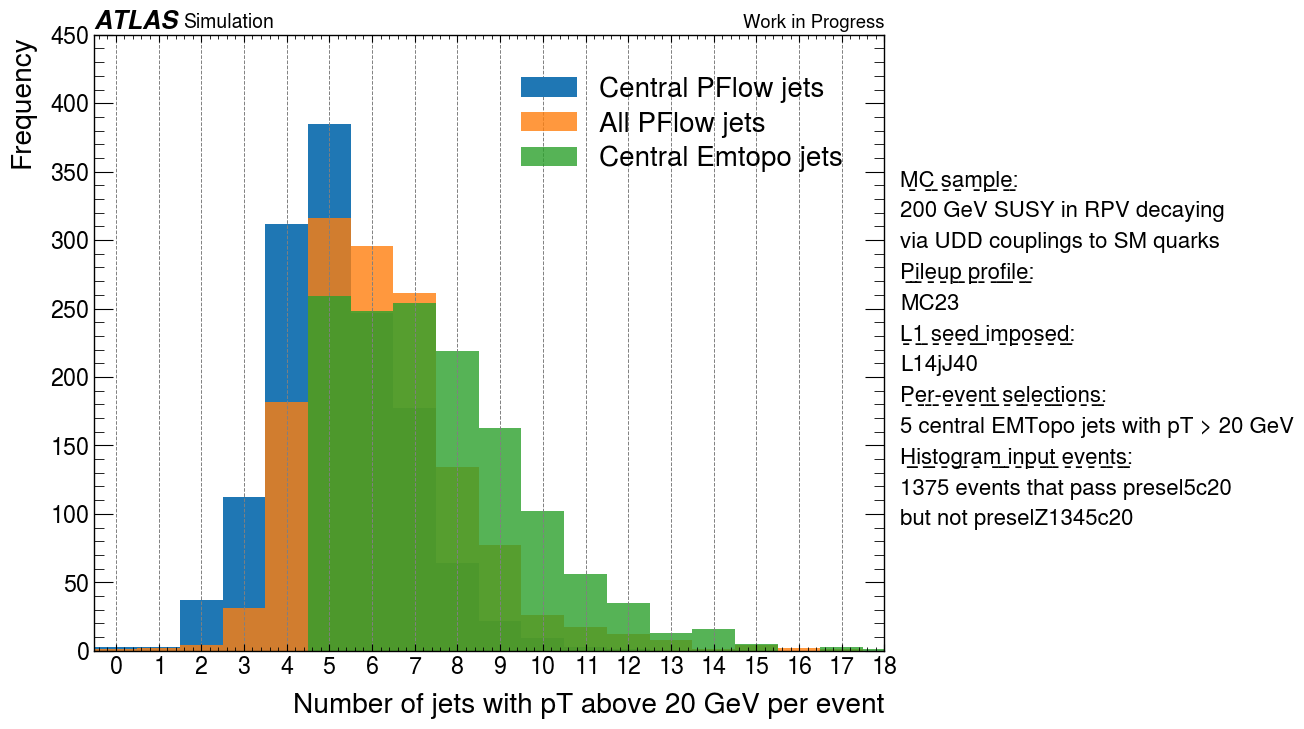

In [52]:
"""Jet Multiplicity Plots"""
# Set ATLAS Style
plt.style.use(hep.style.ATLAS)

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

# Define bin edges to center on integers
num_bins = 21
bin_edges = np.arange(-0.5, 120.5, 1)  # This will create bins centered at integers from -1 to 15

# Plot histograms with centered bins
ax.hist(num_central_jets_above_20_GeV, bins=bin_edges, alpha=1, label='Central PFlow jets', histtype='stepfilled', density=False)
ax.hist(num_jets_above_20_GeV, bins=bin_edges, alpha=0.8, label='All PFlow jets', histtype='stepfilled', density=False)
ax.hist(num_central_emtopo_jets_above_20_GeV, bins=bin_edges, alpha=0.8, label='Central Emtopo jets', histtype='stepfilled', density=False)

# Underline function using combining underline character
def underline(text):
    return ''.join([char + '\u0332' for char in text])

# Adding custom text with underlining specific lines
text_x, text_y = 1.02, 0.78   # Adjust as necessary

# Define each line, with specific lines underlined
analysis_info_lines = [
    underline("MC sample:"),  # Underlined
    "200 GeV SUSY in RPV decaying", 
    "via UDD couplings to SM quarks",
    underline("Pileup profile:"),  # Underlined
    "MC23",
    underline("L1 seed imposed:"),  # Underlined
    "L14jJ40",
    underline("Per-event selections:"),  # Underlined
    "5 central EMTopo jets with pT > 20 GeV",
    underline("Histogram input events:"),  # Underlined
    "1375 events that pass presel5c20",
    "but not preselZ1345c20"
]

# Display each line of the analysis info text, incrementing the y-position
for i, line in enumerate(analysis_info_lines):
    ax.text(text_x, text_y - i * 0.05, line, transform=ax.transAxes, verticalalignment='top', fontsize=16)

# Set integer x-ticks to show all integer values
ax.set_xticks(np.arange(0, 20, 1))  

# Add vertical dashed lines at each bin edge
for edge in np.arange(0, 20, 1):
    ax.axvline(edge, color='gray', linestyle='--', linewidth=0.7)

# Customize legend and labels
plt.legend(loc='upper right', fontsize=20)
plt.xlabel("Number of jets with pT above 20 GeV per event")
plt.ylabel("Frequency")
#plt.ylim([0, 450])
plt.xlim([-0.5,18])

# Show plot
plt.show()

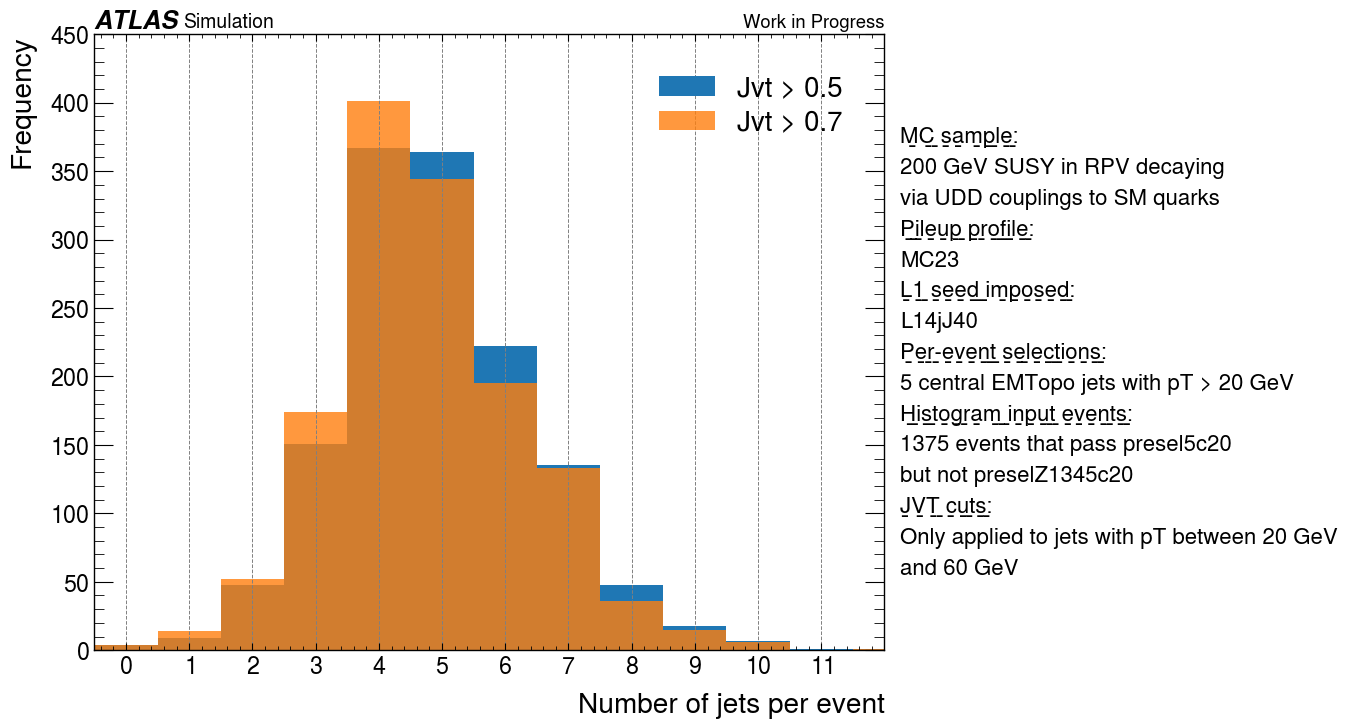

In [53]:
"""JVT Plots"""
# Set ATLAS Style
plt.style.use(hep.style.ATLAS)

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
hep.atlas.label(ax, llabel="Simulation", loc=0, rlabel="Work in Progress")

# Define bin edges to center on integers
num_bins = 16
bin_edges = np.arange(-0.5, 15.5, 1)  # This will create bins centered at integers from -1 to 15

# Plot histograms with centered bins
ax.hist(jvt_05, bins=bin_edges, alpha=1, label='Jvt > 0.5', histtype='stepfilled', density=False)
ax.hist(jvt_07, bins=bin_edges, alpha=0.8, label='Jvt > 0.7', histtype='stepfilled', density=False)

# Underline function using combining underline character
def underline(text):
    return ''.join([char + '\u0332' for char in text])

# Adding custom text with underlining specific lines
text_x, text_y = 1.02, 0.85   # Adjust as necessary

# Define each line, with specific lines underlined
analysis_info_lines = [
    underline("MC sample:"),  # Underlined
    "200 GeV SUSY in RPV decaying", 
    "via UDD couplings to SM quarks",
    underline("Pileup profile:"),  # Underlined
    "MC23",
    underline("L1 seed imposed:"),  # Underlined
    "L14jJ40",
    underline("Per-event selections:"),  # Underlined
    "5 central EMTopo jets with pT > 20 GeV",
    underline("Histogram input events:"),  # Underlined
    "1375 events that pass presel5c20",
    "but not preselZ1345c20",
    underline("JVT cuts:"),  # Underlined
    "Only applied to jets with pT between 20 GeV",
    "and 60 GeV"
]

# Display each line of the analysis info text, incrementing the y-position
for i, line in enumerate(analysis_info_lines):
    ax.text(text_x, text_y - i * 0.05, line, transform=ax.transAxes, verticalalignment='top', fontsize=16)

# Set integer x-ticks to show all integer values
ax.set_xticks(np.arange(0, 12, 1))  

# Add vertical dashed lines at each bin edge
for edge in np.arange(0, 12, 1):
    ax.axvline(edge, color='gray', linestyle='--', linewidth=0.7)

# Customize legend and labels
plt.legend(loc='upper right', fontsize=20)
plt.xlabel("Number of jets per event")
plt.ylabel("Frequency")
#plt.ylim([0, 420])
plt.xlim([-0.5,12])

# Show plot
plt.show()

### Studying efficiency numbers 

In [119]:
# Getting the event IDs for the events passing the L14jJ40
jets = np.asarray(File("/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5", 'r')['jets'])
evts_RPV_200_L14jJ40 = np.unique(jets["eventNumber"])
jets = np.asarray(File("/users/maboelela/PhD/DIPZ/Datasets/RPV_100_L14jJ40.h5", 'r')['jets'])
evts_RPV_100_L14jJ40 = np.unique(jets["eventNumber"])

In [64]:
# Getting the events passing the different WPs

### 5j preselection for 200 GeV Mass point
evts_passing_Z142_rpv200_preselZ5c20 = []
evts_passing_Z134_rpv200_preselZ5c20 = []
evts_passing_Z124_rpv200_preselZ5c20 = []

for i in np.arange(0,len(rpv200_preselZ5c20_dist),1):
    if rpv200_preselZ5c20_dist[i] > -1 * ( 142 / 10):
        evts_passing_Z142_rpv200_preselZ5c20.append(evts_rpv200_preselZ5c20[i])
    if rpv200_preselZ5c20_dist[i] > -1 * ( 134 / 10):
        evts_passing_Z134_rpv200_preselZ5c20.append(evts_rpv200_preselZ5c20[i])
    if rpv200_preselZ5c20_dist[i] > -1 * ( 124 / 10):
        evts_passing_Z124_rpv200_preselZ5c20.append(evts_rpv200_preselZ5c20[i])

### 6j preselection for 200 GeV Mass point
evts_passing_Z219_rpv200_preselZ6c20 = []
evts_passing_Z197_rpv200_preselZ6c20 = []
evts_passing_Z182_rpv200_preselZ6c20 = []

for i in np.arange(0,len(rpv200_preselZ6c20_dist),1):
    if rpv200_preselZ6c20_dist[i] > -1 * ( 219 / 10):
        evts_passing_Z219_rpv200_preselZ6c20.append(evts_rpv200_preselZ6c20[i])
    if rpv200_preselZ6c20_dist[i] > -1 * ( 197 / 10):
        evts_passing_Z197_rpv200_preselZ6c20.append(evts_rpv200_preselZ6c20[i])
    if rpv200_preselZ6c20_dist[i] > -1 * ( 182 / 10):
        evts_passing_Z182_rpv200_preselZ6c20.append(evts_rpv200_preselZ6c20[i])
        
### 5j preselection for 100 GeV Mass point
evts_passing_Z142_rpv100_preselZ5c20 = []
evts_passing_Z134_rpv100_preselZ5c20 = []
evts_passing_Z124_rpv100_preselZ5c20 = []

for i in np.arange(0,len(rpv100_preselZ5c20_dist),1):
    if rpv100_preselZ5c20_dist[i] > -1 * ( 142 / 10):
        evts_passing_Z142_rpv100_preselZ5c20.append(evts_rpv100_preselZ5c20[i])
    if rpv100_preselZ5c20_dist[i] > -1 * ( 134 / 10):
        evts_passing_Z134_rpv100_preselZ5c20.append(evts_rpv100_preselZ5c20[i])
    if rpv100_preselZ5c20_dist[i] > -1 * ( 124 / 10):
        evts_passing_Z124_rpv100_preselZ5c20.append(evts_rpv100_preselZ5c20[i])

### 6j preselection for 100 GeV Mass point
evts_passing_Z219_rpv100_preselZ6c20 = []
evts_passing_Z197_rpv100_preselZ6c20 = []
evts_passing_Z182_rpv100_preselZ6c20 = []

for i in np.arange(0,len(rpv100_preselZ6c20_dist),1):
    if rpv100_preselZ6c20_dist[i] > -1 * ( 219 / 10):
        evts_passing_Z219_rpv100_preselZ6c20.append(evts_rpv100_preselZ6c20[i])
    if rpv100_preselZ6c20_dist[i] > -1 * ( 197 / 10):
        evts_passing_Z197_rpv100_preselZ6c20.append(evts_rpv100_preselZ6c20[i])
    if rpv100_preselZ6c20_dist[i] > -1 * ( 182 / 10):
        evts_passing_Z182_rpv100_preselZ6c20.append(evts_rpv100_preselZ6c20[i])

In [66]:
# Getting the events passing the 6j20 main selection chains

### 200 GeV mass point
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_pflow.h5", 'r')
pflow_jets = data['jets']
pflow_jets = np.asarray(pflow_jets)
evt_IDs_pflow = np.unique(pflow_jets["eventNumber"])

evts_passing_Z142_rpv200_6j20_preselZ5c20 = []
evts_passing_Z134_rpv200_6j20_preselZ5c20 = []
evts_passing_Z124_rpv200_6j20_preselZ5c20 = []
evts_passing_Z219_rpv200_6j20_preselZ6c20 = []
evts_passing_Z197_rpv200_6j20_preselZ6c20 = []
evts_passing_Z182_rpv200_6j20_preselZ6c20 = []

for evt_id in evt_IDs_pflow:
    # Filter jets for the current event ID
    analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]

    # Filter for jets with pT > 20 GeV
    jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
    
    if len(jets_above_20_GeV) < 6:
        continue

    if evt_id in evts_passing_Z142_rpv200_preselZ5c20:
        evts_passing_Z142_rpv200_6j20_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z134_rpv200_preselZ5c20:
        evts_passing_Z134_rpv200_6j20_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z124_rpv200_preselZ5c20:
        evts_passing_Z124_rpv200_6j20_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z219_rpv200_preselZ6c20:
        evts_passing_Z219_rpv200_6j20_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z197_rpv200_preselZ6c20:
        evts_passing_Z197_rpv200_6j20_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z182_rpv200_preselZ6c20:
        evts_passing_Z182_rpv200_6j20_preselZ6c20.append(evt_id)


### 100 GeV mass point
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_100_L14jJ40_pflow.h5", 'r')
pflow_jets = data['jets']
pflow_jets = np.asarray(pflow_jets)
evt_IDs_pflow = np.unique(pflow_jets["eventNumber"])

evts_passing_Z142_rpv100_6j20_preselZ5c20 = []
evts_passing_Z134_rpv100_6j20_preselZ5c20 = []
evts_passing_Z124_rpv100_6j20_preselZ5c20 = []
evts_passing_Z219_rpv100_6j20_preselZ6c20 = []
evts_passing_Z197_rpv100_6j20_preselZ6c20 = []
evts_passing_Z182_rpv100_6j20_preselZ6c20 = []

for evt_id in evt_IDs_pflow:
    # Filter jets for the current event ID
    analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]

    # Filter for jets with pT > 20 GeV
    jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
    
    if len(jets_above_20_GeV) < 6:
        continue

    if evt_id in evts_passing_Z142_rpv100_preselZ5c20:
        evts_passing_Z142_rpv100_6j20_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z134_rpv100_preselZ5c20:
        evts_passing_Z134_rpv100_6j20_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z124_rpv100_preselZ5c20:
        evts_passing_Z124_rpv100_6j20_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z219_rpv100_preselZ6c20:
        evts_passing_Z219_rpv100_6j20_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z197_rpv100_preselZ6c20:
        evts_passing_Z197_rpv100_6j20_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z182_rpv100_preselZ6c20:
        evts_passing_Z182_rpv100_6j20_preselZ6c20.append(evt_id)

In [67]:
# Getting the events passing the 6j20c_020jvt main selection chains

### 200 GeV mass point
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_pflow.h5", 'r')
pflow_jets = data['jets']
pflow_jets = np.asarray(pflow_jets)
evt_IDs_pflow = np.unique(pflow_jets["eventNumber"])

evts_passing_Z142_rpv200_6j20c_020jvt_preselZ5c20 = []
evts_passing_Z134_rpv200_6j20c_020jvt_preselZ5c20 = []
evts_passing_Z124_rpv200_6j20c_020jvt_preselZ5c20 = []
evts_passing_Z219_rpv200_6j20c_020jvt_preselZ6c20 = []
evts_passing_Z197_rpv200_6j20c_020jvt_preselZ6c20 = []
evts_passing_Z182_rpv200_6j20c_020jvt_preselZ6c20 = []

for evt_id in evt_IDs_pflow:
    # Filter jets for the current event ID
    analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]

    # Filter for jets with pT > 20 GeV
    jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]

    # Filter for eta within central region and apply pT cut
    central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
    
    # Apply JVT cuts on jets within the central region with pT > 20 GeV
    jvt_array = central_jets_above_20_GeV["Jvt"]
    
    # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
    filtered_jets = central_jets_above_20_GeV[
        ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
          (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
          (central_jets_above_20_GeV["Jvt"] < 0.2))
    ]
        
    if len(filtered_jets) < 6:
        continue

    if evt_id in evts_passing_Z142_rpv200_preselZ5c20:
        evts_passing_Z142_rpv200_6j20c_020jvt_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z134_rpv200_preselZ5c20:
        evts_passing_Z134_rpv200_6j20c_020jvt_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z124_rpv200_preselZ5c20:
        evts_passing_Z124_rpv200_6j20c_020jvt_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z219_rpv200_preselZ6c20:
        evts_passing_Z219_rpv200_6j20c_020jvt_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z197_rpv200_preselZ6c20:
        evts_passing_Z197_rpv200_6j20c_020jvt_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z182_rpv200_preselZ6c20:
        evts_passing_Z182_rpv200_6j20c_020jvt_preselZ6c20.append(evt_id)


### 100 GeV mass point
data = File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_100_L14jJ40_pflow.h5", 'r')
pflow_jets = data['jets']
pflow_jets = np.asarray(pflow_jets)
evt_IDs_pflow = np.unique(pflow_jets["eventNumber"])

evts_passing_Z142_rpv100_6j20c_020jvt_preselZ5c20 = []
evts_passing_Z134_rpv100_6j20c_020jvt_preselZ5c20 = []
evts_passing_Z124_rpv100_6j20c_020jvt_preselZ5c20 = []
evts_passing_Z219_rpv100_6j20c_020jvt_preselZ6c20 = []
evts_passing_Z197_rpv100_6j20c_020jvt_preselZ6c20 = []
evts_passing_Z182_rpv100_6j20c_020jvt_preselZ6c20 = []

for evt_id in evt_IDs_pflow:
    # Filter jets for the current event ID
    analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]

    # Filter for jets with pT > 20 GeV
    jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]

    # Filter for eta within central region and apply pT cut
    central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
    
    # Apply JVT cuts on jets within the central region with pT > 20 GeV
    jvt_array = central_jets_above_20_GeV["Jvt"]
    
    # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
    filtered_jets = central_jets_above_20_GeV[
        ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
          (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
          (central_jets_above_20_GeV["Jvt"] < 0.2))
    ]
        
    if len(filtered_jets) < 6:
        continue

    if evt_id in evts_passing_Z142_rpv100_preselZ5c20:
        evts_passing_Z142_rpv100_6j20c_020jvt_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z134_rpv100_preselZ5c20:
        evts_passing_Z134_rpv100_6j20c_020jvt_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z124_rpv100_preselZ5c20:
        evts_passing_Z124_rpv100_6j20c_020jvt_preselZ5c20.append(evt_id)
    if evt_id in evts_passing_Z219_rpv100_preselZ6c20:
        evts_passing_Z219_rpv100_6j20c_020jvt_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z197_rpv100_preselZ6c20:
        evts_passing_Z197_rpv100_6j20c_020jvt_preselZ6c20.append(evt_id)
    if evt_id in evts_passing_Z182_rpv100_preselZ6c20:
        evts_passing_Z182_rpv100_6j20c_020jvt_preselZ6c20.append(evt_id)

In [130]:
# Creating an tuple to act as a placeholder for the chains and their event IDs
chains = [
    ("RPV_200_L14jJ40", evts_RPV_200_L14jJ40),
    ("RPV_100_L14jJ40", evts_RPV_100_L14jJ40),
    ("rpv_200_6j20_presel6c25", evts_rpv_200_6j20_presel6c25),
    ("rpv_100_6j20_presel6c25", evts_rpv_100_6j20_presel6c25),
    ("rpv200_preselZ5c20", evts_rpv200_preselZ5c20),
    ("rpv100_preselZ5c20", evts_rpv100_preselZ5c20),
    ("Z142_rpv200_preselZ5c20", evts_passing_Z142_rpv200_preselZ5c20),
    ("Z142_rpv100_preselZ5c20", evts_passing_Z142_rpv100_preselZ5c20),
    ("Z142_rpv200_6j20_preselZ5c20", evts_passing_Z142_rpv200_6j20_preselZ5c20),
    ("Z142_rpv100_6j20_preselZ5c20", evts_passing_Z142_rpv100_6j20_preselZ5c20),
    ("Z142_rpv200_6j20c_020jvt_preselZ5c20", evts_passing_Z142_rpv200_6j20c_020jvt_preselZ5c20),
    ("Z142_rpv100_6j20c_020jvt_preselZ5c20", evts_passing_Z142_rpv100_6j20c_020jvt_preselZ5c20),
    ("Z134_rpv200_preselZ5c20", evts_passing_Z134_rpv200_preselZ5c20),
    ("Z134_rpv100_preselZ5c20", evts_passing_Z134_rpv100_preselZ5c20),
    ("Z134_rpv200_6j20_preselZ5c20", evts_passing_Z134_rpv200_6j20_preselZ5c20),
    ("Z134_rpv100_6j20_preselZ5c20", evts_passing_Z134_rpv100_6j20_preselZ5c20),
    ("Z134_rpv200_6j20c_020jvt_preselZ5c20", evts_passing_Z134_rpv200_6j20c_020jvt_preselZ5c20),
    ("Z134_rpv100_6j20c_020jvt_preselZ5c20", evts_passing_Z134_rpv100_6j20c_020jvt_preselZ5c20),
    ("Z124_rpv200_preselZ5c20", evts_passing_Z124_rpv200_preselZ5c20),
    ("Z124_rpv100_preselZ5c20", evts_passing_Z124_rpv100_preselZ5c20),
    ("Z124_rpv200_6j20_preselZ5c20", evts_passing_Z124_rpv200_6j20_preselZ5c20),
    ("Z124_rpv100_6j20_preselZ5c20", evts_passing_Z124_rpv100_6j20_preselZ5c20),
    ("Z124_rpv200_6j20c_020jvt_preselZ5c20", evts_passing_Z124_rpv200_6j20c_020jvt_preselZ5c20),
    ("Z124_rpv100_6j20c_020jvt_preselZ5c20", evts_passing_Z124_rpv100_6j20c_020jvt_preselZ5c20),
    ("rpv200_preselZ6c20", evts_rpv200_preselZ6c20),
    ("rpv100_preselZ6c20", evts_rpv100_preselZ6c20),
    ("Z219_rpv200_preselZ6c20", evts_passing_Z219_rpv200_preselZ6c20),
    ("Z219_rpv100_preselZ6c20", evts_passing_Z219_rpv100_preselZ6c20),
    ("Z219_rpv200_6j20_preselZ6c20", evts_passing_Z219_rpv200_6j20_preselZ6c20),
    ("Z219_rpv100_6j20_preselZ6c20", evts_passing_Z219_rpv100_6j20_preselZ6c20),
    ("Z219_rpv200_6j20c_020jvt_preselZ6c20", evts_passing_Z219_rpv200_6j20c_020jvt_preselZ6c20),
    ("Z219_rpv100_6j20c_020jvt_preselZ6c20", evts_passing_Z219_rpv100_6j20c_020jvt_preselZ6c20),
    ("Z197_rpv200_preselZ6c20", evts_passing_Z197_rpv200_preselZ6c20),
    ("Z197_rpv100_preselZ6c20", evts_passing_Z197_rpv100_preselZ6c20),
    ("Z197_rpv200_6j20_preselZ6c20", evts_passing_Z197_rpv200_6j20_preselZ6c20),
    ("Z197_rpv100_6j20_preselZ6c20", evts_passing_Z197_rpv100_6j20_preselZ6c20),
    ("Z197_rpv200_6j20c_020jvt_preselZ6c20", evts_passing_Z197_rpv200_6j20c_020jvt_preselZ6c20),
    ("Z197_rpv100_6j20c_020jvt_preselZ6c20", evts_passing_Z197_rpv100_6j20c_020jvt_preselZ6c20),
    ("Z182_rpv200_preselZ6c20", evts_passing_Z182_rpv200_preselZ6c20),
    ("Z182_rpv100_preselZ6c20", evts_passing_Z182_rpv100_preselZ6c20),
    ("Z182_rpv200_6j20_preselZ6c20", evts_passing_Z182_rpv200_6j20_preselZ6c20),
    ("Z182_rpv100_6j20_preselZ6c20", evts_passing_Z182_rpv100_6j20_preselZ6c20),
    ("Z182_rpv200_6j20c_020jvt_preselZ6c20", evts_passing_Z182_rpv200_6j20c_020jvt_preselZ6c20),
    ("Z182_rpv100_6j20c_020jvt_preselZ6c20", evts_passing_Z182_rpv100_6j20c_020jvt_preselZ6c20)
]

In [ ]:
# The Analysis Efficiency Calculation (Percentage of events passing the chain emulation + having 6 analysis jets (pflow jets that are central, having a minimum pT of 20 GeV and a JVT > 0.2 if the jet's pT is between 20 GeV and 60 GeV))

pflow_jets = np.asarray(File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_pflow.h5", 'r')['jets'])

for chain_name, evt_ids in chains:
    if "200" in chain_name:
        good_evts_counter = 0
        pass_pT_cut = False
        pass_eta_cut = False
        pass_Jvt_cut = False
        pass_l1_ineff = True
        for evt_id in evt_ids:
            # Filter jets for the current event ID
            analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]
            
            # Filter for jets with pT > 20 GeV
            jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
            pass_pT_cut = len(jets_above_20_GeV) >= 6

            # Filter for eta within central region and apply pT cut
            central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
            pass_eta_cut = len(central_jets_above_20_GeV) >= 6
            
            # Apply JVT cuts on jets within the central region with pT > 20 GeV
            jvt_array = central_jets_above_20_GeV["Jvt"]
            
            # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
            filtered_jets = central_jets_above_20_GeV[
                ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
                (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
                (central_jets_above_20_GeV["Jvt"] < 0.2))
            ]
            pass_Jvt_cut = len(filtered_jets) >=6
            
            # Checking if the event is good for analysis
            if pass_pT_cut and pass_eta_cut and pass_Jvt_cut and pass_l1_ineff:
                good_evts_counter += 1
            
            pass_pT_cut = False
            pass_eta_cut = False
            pass_Jvt_cut = False
            pass_l1_ineff = True
        
        print("The analysis efficiency of the (" + chain_name + ") chain is: " + str(good_evts_counter / 100) + "%" )
        
pflow_jets = np.asarray(File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_100_L14jJ40_pflow.h5", 'r')['jets'])

for chain_name, evt_ids in chains:
    if "100" in chain_name:
        good_evts_counter = 0
        pass_pT_cut = False
        pass_eta_cut = False
        pass_Jvt_cut = False
        pass_l1_ineff = True
        for evt_id in evt_ids:
            # Filter jets for the current event ID
            analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]
            
            # Filter for jets with pT > 20 GeV
            jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
            pass_pT_cut = len(jets_above_20_GeV) >= 6

            # Filter for eta within central region and apply pT cut
            central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
            pass_eta_cut = len(central_jets_above_20_GeV) >= 6
            
            # Apply JVT cuts on jets within the central region with pT > 20 GeV
            jvt_array = central_jets_above_20_GeV["Jvt"]
            
            # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
            filtered_jets = central_jets_above_20_GeV[
                ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
                (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
                (central_jets_above_20_GeV["Jvt"] < 0.2))
            ]
            pass_Jvt_cut = len(filtered_jets) >=6
            
            # Checking if the event is good for analysis
            if pass_pT_cut and pass_eta_cut and pass_Jvt_cut and pass_l1_ineff:
                good_evts_counter += 1
            
            pass_pT_cut = False
            pass_eta_cut = False
            pass_Jvt_cut = False
            pass_l1_ineff = True
        
        print("The analysis efficiency of the (" + chain_name + ") chain is: " + str(good_evts_counter / 100) + "%" )

The analysis efficiency of the (RPV_200_L14jJ40) chain is: 57.53%
The analysis efficiency of the (rpv_200_6j20_presel6c25) chain is: 50.07%
The analysis efficiency of the (rpv200_preselZ5c20) chain is: 57.39%
The analysis efficiency of the (Z142_rpv200_preselZ5c20) chain is: 54.0%
The analysis efficiency of the (Z142_rpv200_6j20_preselZ5c20) chain is: 54.0%
The analysis efficiency of the (Z142_rpv200_6j20c_020jvt_preselZ5c20) chain is: 54.0%
The analysis efficiency of the (Z134_rpv200_preselZ5c20) chain is: 52.16%
The analysis efficiency of the (Z134_rpv200_6j20_preselZ5c20) chain is: 52.16%
The analysis efficiency of the (Z134_rpv200_6j20c_020jvt_preselZ5c20) chain is: 52.16%
The analysis efficiency of the (Z124_rpv200_preselZ5c20) chain is: 49.24%
The analysis efficiency of the (Z124_rpv200_6j20_preselZ5c20) chain is: 49.24%
The analysis efficiency of the (Z124_rpv200_6j20c_020jvt_preselZ5c20) chain is: 49.24%
The analysis efficiency of the (rpv200_preselZ6c20) chain is: 55.91%
The a

In [132]:
# The Super Analysis Efficiency Calculation (Analysis efficiency + L1 inefficiency of L14jJ40)

pflow_jets = np.asarray(File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_200_L14jJ40_pflow.h5", 'r')['jets'])

for chain_name, evt_ids in chains:
    if "200" in chain_name:
        good_evts_counter = 0
        pass_pT_cut = False
        pass_eta_cut = False
        pass_Jvt_cut = False
        pass_l1_ineff = False
        for evt_id in evt_ids:
            # Filter jets for the current event ID
            analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]
            
            # L1 inefficiency cut (Check 4th slide in https://indico.cern.ch/event/1474435/#preview:5238259)
            if len(analysis_jets) >= 4:
                pass_l1_ineff = analysis_jets[3]['pt'] > 70 * 1000

            # Filter for jets with pT > 20 GeV
            jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
            pass_pT_cut = len(jets_above_20_GeV) >= 6

            # Filter for eta within central region and apply pT cut
            central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
            pass_eta_cut = len(central_jets_above_20_GeV) >= 6
            
            # Apply JVT cuts on jets within the central region with pT > 20 GeV
            jvt_array = central_jets_above_20_GeV["Jvt"]
            
            # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
            filtered_jets = central_jets_above_20_GeV[
                ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
                (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
                (central_jets_above_20_GeV["Jvt"] < 0.2))
            ]
            pass_Jvt_cut = len(filtered_jets) >=6
            
            # Checking if the event is good for analysis
            if pass_pT_cut and pass_eta_cut and pass_Jvt_cut and pass_l1_ineff:
                good_evts_counter += 1
            
            pass_pT_cut = False
            pass_eta_cut = False
            pass_Jvt_cut = False
            pass_l1_ineff = False
        
        print("The super analysis efficiency of the (" + chain_name + ") chain is: " + str(good_evts_counter / 100) + "%" )
        
pflow_jets = np.asarray(File("/users/maboelela/Work/DIPZ/Datasets/H5_Files/RPV_100_L14jJ40_pflow.h5", 'r')['jets'])

for chain_name, evt_ids in chains:
    if "100" in chain_name:
        good_evts_counter = 0
        pass_pT_cut = False
        pass_eta_cut = False
        pass_Jvt_cut = False
        pass_l1_ineff = False
        for evt_id in evt_ids:
            # Filter jets for the current event ID
            analysis_jets = pflow_jets[pflow_jets["eventNumber"] == evt_id]
            
            # L1 inefficiency cut (Check 4th slide in https://indico.cern.ch/event/1474435/#preview:5238259)
            if len(analysis_jets) >= 4:
                pass_l1_ineff = analysis_jets[3]['pt'] > 70 * 1000

            # Filter for jets with pT > 20 GeV
            jets_above_20_GeV = analysis_jets[analysis_jets["pt"] >= 20 * 1000]
            pass_pT_cut = len(jets_above_20_GeV) >= 6

            # Filter for eta within central region and apply pT cut
            central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) <= 2.4]
            pass_eta_cut = len(central_jets_above_20_GeV) >= 6
            
            # Apply JVT cuts on jets within the central region with pT > 20 GeV
            jvt_array = central_jets_above_20_GeV["Jvt"]
            
            # Additional Filtering based on JVT and pT for 20 GeV < pT < 60 GeV
            filtered_jets = central_jets_above_20_GeV[
                ~((central_jets_above_20_GeV["pt"] >= 20 * 1000) & 
                (central_jets_above_20_GeV["pt"] <= 60 * 1000) & 
                (central_jets_above_20_GeV["Jvt"] < 0.2))
            ]
            pass_Jvt_cut = len(filtered_jets) >=6
            
            # Checking if the event is good for analysis
            if pass_pT_cut and pass_eta_cut and pass_Jvt_cut and pass_l1_ineff:
                good_evts_counter += 1
            
            pass_pT_cut = False
            pass_eta_cut = False
            pass_Jvt_cut = False
            pass_l1_ineff = False
        
        print("The super analysis efficiency of the (" + chain_name + ") chain is: " + str(good_evts_counter / 100) + "%" )

The super analysis efficiency of the (RPV_200_L14jJ40) chain is: 14.74%
The super analysis efficiency of the (rpv_200_6j20_presel6c25) chain is: 13.81%
The super analysis efficiency of the (rpv200_preselZ5c20) chain is: 14.72%
The super analysis efficiency of the (Z142_rpv200_preselZ5c20) chain is: 14.25%
The super analysis efficiency of the (Z142_rpv200_6j20_preselZ5c20) chain is: 14.25%
The super analysis efficiency of the (Z142_rpv200_6j20c_020jvt_preselZ5c20) chain is: 14.25%
The super analysis efficiency of the (Z134_rpv200_preselZ5c20) chain is: 13.89%
The super analysis efficiency of the (Z134_rpv200_6j20_preselZ5c20) chain is: 13.89%
The super analysis efficiency of the (Z134_rpv200_6j20c_020jvt_preselZ5c20) chain is: 13.89%
The super analysis efficiency of the (Z124_rpv200_preselZ5c20) chain is: 13.18%
The super analysis efficiency of the (Z124_rpv200_6j20_preselZ5c20) chain is: 13.18%
The super analysis efficiency of the (Z124_rpv200_6j20c_020jvt_preselZ5c20) chain is: 13.18%

## ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Trial and Error

In [57]:
# Filter jets for the current event ID
ID = list(s)[1]
analysis_jets = pflow_jets[pflow_jets["eventNumber"] == ID][["pt", "eta", "Jvt"]]
PVz = pflow_jets[pflow_jets["eventNumber"] == ID][1]["primaryVertexDetectorZ"]

jets_above_20_GeV = analysis_jets[analysis_jets["pt"] > 20 * 1000]
central_jets_above_20_GeV = jets_above_20_GeV[np.abs(jets_above_20_GeV["eta"]) < 2.4]
filtered_jets = central_jets_above_20_GeV[
    ~((central_jets_above_20_GeV["pt"] > 20 * 1000) & 
      (central_jets_above_20_GeV["pt"] < 60 * 1000) & 
      (central_jets_above_20_GeV["Jvt"] < 0.5))
]

print("analysis jet: ")
print(analysis_jets)
print("filtered_jets jet: ")
print(filtered_jets)

IndexError: index 1 is out of bounds for axis 0 with size 0

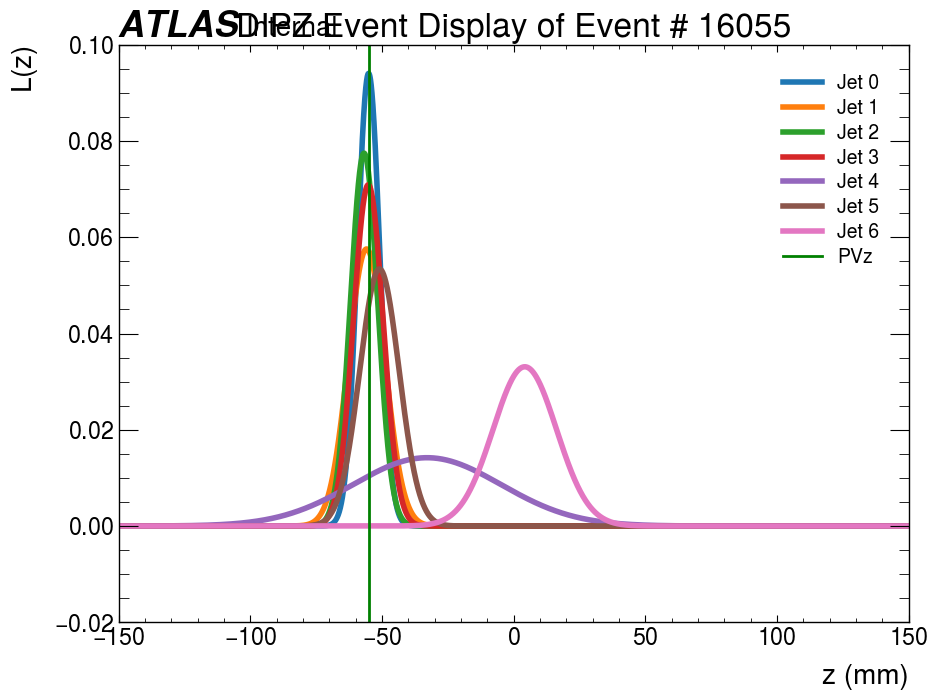

In [46]:
# Load data
name = "/users/maboelela/PhD/DIPZ/Datasets/RPV_200_L14jJ40.h5"
data = File(name, 'r')
jets = np.asarray(data['jets'])
uniques = np.unique(jets["eventNumber"])

# Selecting a Random Event ID from Preselected Events 
random_number = random.randrange(0, len(uniques))

# Select a random event from preselected events
#event_id = random.choice(evts_rpv_200_presel5c20)
event_id = random.choice(uniques)
event_id = 16055
event_jets = jets[jets["eventNumber"] == ID]
num_jets = len(event_jets)

# Setup plot
fig, ax = plt.subplots(figsize=(10, 7.5))
hep.atlas.label(ax=ax, loc=0, data=True, label="Internal", year=2023, com=13.6, rlabel="", fontsize=20
                #lumi=0.00442985,
                #lumi_format="{0:.1}",
                #llabel="Internal", 
                #fontname="",
                #exp_weight="",
                #italic=((True,True,True)),
                #pad = 
               )


# Generate colors for each jet
#colors = plt.cm.viridis(np.linspace(0, 1, num_jets))

# Plot Gaussian distributions
x = np.arange(-150, 150, 0.01)
for i in range(num_jets):
    mu = event_jets[i]["dipz20231122_z"]
    sigma = np.exp(-0.5 * event_jets[i]["dipz20231122_negLogSigma2"])
    ax.plot(x, norm.pdf(x, mu, sigma), linewidth=4, label=f'Jet {i}')
plt.axvline(x=PVz, color='green', linestyle='-', linewidth=2, label="PVz")


# Finalize plot
plt.xlabel("z (mm)", loc='right')
plt.ylabel("$\mathcal{L}$(z)")
plt.title(f"DIPZ Event Display of Event # {event_id}")
plt.legend(loc='upper right')
plt.show()